# MiniFlow Architecture

Let's consider how to implement this graph structure in MiniFlow. We'll use a Python class to represent a generic node.

In [ ]:
class Node(object):
    def __init__(self):
        # Properties will go here!

We know that each node might receive input from multiple other nodes. We also know that each node creates a single output, which will likely be passed to other nodes. Let's add two lists: one to store references to the inbound nodes, and the other to store references to the outbound nodes.

In [ ]:
class Node(object):
    def __init__(self, inbound_nodes=[]):
        # Node(s) from which this Node receives values
        self.inbound_nodes = inbound_nodes
        # Node(s) to which this Node passes values
        self.outbound_nodes = []
        # For each inbound Node here, add this Node as an outbound Node to _that_ Node.
        for n in self.inbound_nodes:
            n.outbound_nodes.append(self)

Each node will eventually calculate a value that represents its output. Let's initialize the value to None to indicate that it exists but hasn't been set yet.

In [ ]:
class Node(object):
    def __init__(self, inbound_nodes=[]):
        # Node(s) from which this Node receives values
        self.inbound_nodes = inbound_nodes
        # Node(s) to which this Node passes values
        self.outbound_nodes = []
        # For each inbound Node here, add this Node as an outbound Node to _that_ Node.
        for n in self.inbound_nodes:
            n.outbound_nodes.append(self)
        # A calculated value
        self.value = None

Each node will need to be able to pass values forward and perform backpropagation (more on that later). For now, let's add a placeholder method for forward propagation. We'll deal with backpropagation later on.

In [ ]:
class Node(object):
    def __init__(self, inbound_nodes=[]):
        # Node(s) from which this Node receives values
        self.inbound_nodes = inbound_nodes
        # Node(s) to which this Node passes values
        self.outbound_nodes = []
        # For each inbound Node here, add this Node as an outbound Node to _that_ Node.
        for n in self.inbound_nodes:
            n.outbound_nodes.append(self)
        # A calculated value
        self.value = None

    def forward(self):
        """
        Forward propagation.

        Compute the output value based on `inbound_nodes` and
        store the result in self.value.
        """
        raise NotImplemented

### Nodes that Calculate

While Node defines the base set of properties that every node holds, only specialized subclasses of Node will end up in the graph. As part of this lab, you'll build the subclasses of Node that can perform calculations and hold values. For example, consider the Input subclass of Node.

In [ ]:
class Input(Node):
    def __init__(self):
        # An Input node has no inbound nodes,
        # so no need to pass anything to the Node instantiator.
        Node.__init__(self)

    # NOTE: Input node is the only node where the value
    # may be passed as an argument to forward().
    #
    # All other node implementations should get the value
    # of the previous node from self.inbound_nodes
    #
    # Example:
    # val0 = self.inbound_nodes[0].value
    def forward(self, value=None):
        # Overwrite the value if one is passed in.
        if value is not None:
            self.value = value

Unlike the other subclasses of Node, the Input subclass does not actually calculate anything. The Input subclass just holds a value, such as a data feature or a model parameter (weight/bias).

You can set value either explicitly or with the forward() method. This value is then fed through the rest of the neural network.

### The Add Subclass

Add, which is another subclass of Node, actually can perform a calculation (addition).

In [ ]:
class Add(Node):
    def __init__(self, x, y):
        Node.__init__(self, [x, y])

    def forward(self):
        """
        You'll be writing code here in the next quiz!
        """

Notice the difference in the __init__ method, Add.__init__(self, [x, y]). Unlike the Input class, which has no inbound nodes, the Add class takes 2 inbound nodes, x and y, and adds the values of those nodes.

## Forward propagation

MiniFlow has two methods to help you define and then run values through your graphs: topological_sort() and forward_pass().

In order to define your network, you'll need to define the order of operations for your nodes. Given that the input to some node depends on the outputs of others, you need to flatten the graph in such a way where all the input dependencies for each node are resolved before trying to run its calculation. This is a technique called a topological sort.

The topological_sort() function implements topological sorting using Kahn's Algorithm. The details of this method are not important, the result is; topological_sort() returns a sorted list of nodes in which all of the calculations can run in series. topological_sort() takes in a feed_dict, which is how we initially set a value for an Input node. The feed_dict is represented by the Python dictionary data structure. Here's an example use case:

In [ ]:
# Define 2 `Input` nodes.
x, y = Input(), Input()

# Define an `Add` node, the two above`Input` nodes being the input.
add = Add(x, y)

# The value of `x` and `y` will be set to 10 and 20 respectively.
feed_dict = {x: 10, y: 20}

# Sort the nodes with topological sort.
sorted_nodes = topological_sort(feed_dict=feed_dict)

(You can find the source code for topological_sort() in miniflow.py in the programming quiz below.)

The other method at your disposal is forward_pass(), which actually runs the network and outputs a value.

In [ ]:
def forward_pass(output_node, sorted_nodes):
    """
    Performs a forward pass through a list of sorted nodes.

    Arguments:

        `output_node`: The output node of the graph (no outgoing edges).
        `sorted_nodes`: a topologically sorted list of nodes.

    Returns the output node's value
    """

    for n in sorted_nodes:
        n.forward()

    return output_node.value

# QUIZ

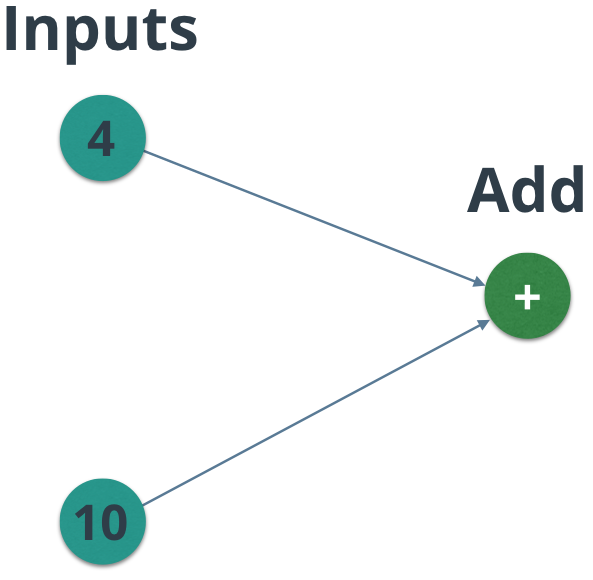

In [15]:
from IPython.display import Image
Image(filename='addition-graph.png') 

In [1]:
"""
You need to change the Add() class below.
"""

class Node(object):
    def __init__(self, inbound_nodes=[]):
        # Nodes from which this Node receives values
        self.inbound_nodes = inbound_nodes
        # Nodes to which this Node passes values
        self.outbound_nodes = []
        # A calculated value
        self.value = None
        # Add this node as an outbound node on its inputs.
        for n in self.inbound_nodes:
            n.outbound_nodes.append(self)

    # These will be implemented in a subclass.
    def forward(self):
        """
        Forward propagation.

        Compute the output value based on `inbound_nodes` and
        store the result in self.value.
        """
        raise NotImplemented


class Input(Node):
    def __init__(self):
        # an Input node has no inbound nodes,
        # so no need to pass anything to the Node instantiator
        Node.__init__(self)

    # NOTE: Input node is the only node that may
    # receive its value as an argument to forward().
    #
    # All other node implementations should calculate their
    # values from the value of previous nodes, using
    # self.inbound_nodes
    #
    # Example:
    # val0 = self.inbound_nodes[0].value
    def forward(self, value=None):
        if value is not None:
            self.value = value


class Add(Node):
    def __init__(self, x, y):
        # You could access `x` and `y` in forward with
        # self.inbound_nodes[0] (`x`) and self.inbound_nodes[1] (`y`)
        Node.__init__(self, [x, y])

    def forward(self):
        """
        Set the value of this node (`self.value`) to the sum of it's inbound_nodes.

        Your code here!
        """
        x_value = self.inbound_nodes[0].value
        y_value = self.inbound_nodes[1].value
        self.value = x_value + y_value



"""
No need to change anything below here!
"""


def topological_sort(feed_dict):
    """
    Sort generic nodes in topological order using Kahn's Algorithm.

    `feed_dict`: A dictionary where the key is a `Input` node and the value is the respective value feed to that node.

    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outbound_nodes:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]

        L.append(n)
        for m in n.outbound_nodes:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L


def forward_pass(output_node, sorted_nodes):
    """
    Performs a forward pass through a list of sorted nodes.

    Arguments:

        `output_node`: A node in the graph, should be the output node (have no outgoing edges).
        `sorted_nodes`: A topologically sorted list of nodes.

    Returns the output Node's value
    """

    for n in sorted_nodes:
        n.forward()

    return output_node.value

In [3]:
"""
This script builds and runs a graph with miniflow.

There is no need to change anything to solve this quiz!

However, feel free to play with the network! Can you also
build a network that solves the equation below?

(x + y) + y
"""

#from miniflow import *

x, y = Input(), Input()

f = Add(x, y)

feed_dict = {x: 10, y: 5}

sorted_nodes = topological_sort(feed_dict)
output = forward_pass(f, sorted_nodes)

# NOTE: because topological_sort set the values for the `Input` nodes we could also access
# the value for x with x.value (same goes for y).
print("{} + {} = {} (according to miniflow)".format(feed_dict[x], feed_dict[y], output))


10 + 5 = 15 (according to miniflow)


solution (I'm just showing forward method of the Add class):

In [ ]:
def forward(self):
    x_value = self.inbound_nodes[0].value
    y_value = self.inbound_nodes[1].value
    self.value = x_value + y_value

While this looks simple, I want to show you why I used x_value and y_value from the inbound_nodes array. Let's take a look at the start with Node's constructor:

In [ ]:
class Node(object):
    def __init__(self, inbound_nodes=[]):
        # Node(s) from which this Node receives values.
        self.inbound_nodes = inbound_nodes
        # Removed everything else for brevity.

inbound_nodes are set when the Node is instantiated.

Of course, you weren't using Node directly, rather you used Add, which is a subclass of Node. Add's constructor is responsible for passing the inbound_nodes to Node, which happens here:

In [ ]:
class Add(Node):
    def __init__(self, x, y):
         Node.__init__(self, [x, y]) # calls Node's constructor
    ...

Lastly, there's the question of why node.value holds the value of the inputs. Take a look at the Input class to find out why.

In [ ]:
class Input(Node):
    ...

    # NOTE: Input node is the only node that may
    #  receive its value as an argument to forward().
    #
    # All other node implementations should calculate their
    # values from the value of previous nodes, using 
    # self.inbound_nodes
    #
    # Example:
    # val0 = self.inbound_nodes[0].value
    def forward(self, value=None):
        if value:
            self.value = value

For the Input node, the forward method appears to set the value.

That's not the case with other node subclasses, though. For those subclasses, the value is set when you run topological_sort. See here:

In [ ]:
def topological_sort(feed_dict):
    ...
    if isinstance(n, Input):
        n.value = feed_dict[n]
    ...

And that's it for addition!

Keep going to make MiniFlow more capable.

Bonus Challenges!
These are ungraded challenges as they are more of a test of your Python skills than neural network skills.

Can you make Add accept any number of inputs? Eg. Add(x, y, z).
Can you make a Mul class that multiplies n inputs?

In [9]:
"""
Bonus Challenge!

Write your code in Add (scroll down).
"""

class Node(object):
    def __init__(self, inbound_nodes=[]):
        # Nodes from which this Node receives values
        self.inbound_nodes = inbound_nodes
        # Nodes to which this Node passes values
        self.outbound_nodes = []
        # A calculated value
        self.value = None
        # Add this node as an outbound node on its inputs.
        for n in self.inbound_nodes:
            n.outbound_nodes.append(self)

    # These will be implemented in a subclass.
    def forward(self):
        """
        Forward propagation.

        Compute the output value based on `inbound_nodes` and
        store the result in self.value.
        """
        raise NotImplemented


class Input(Node):
    def __init__(self):
        # An Input Node has no inbound nodes,
        # so no need to pass anything to the Node instantiator
        Node.__init__(self)

    # NOTE: Input Node is the only Node where the value
    # may be passed as an argument to forward().
    #
    # All other Node implementations should get the value
    # of the previous nodes from self.inbound_nodes
    #
    # Example:
    # val0 = self.inbound_nodes[0].value
    def forward(self, value=None):
        # Overwrite the value if one is passed in.
        if value is not None:
            self.value = value


"""
Can you augment the Add class so that it accepts
any number of nodes as input?

Hint: this may be useful:
https://docs.python.org/3/tutorial/controlflow.html#unpacking-argument-lists
"""
class Add(Node):
    # You may need to change this...
    def __init__(self, *inputs):
        Node.__init__(self, inputs)

    def forward(self):
        """
        For reference, here's the old way from the last
        quiz. You'll want to write code here.
        """
        self.value = 0
        for input in self.inbound_nodes:
            self.value += input.value
        # x_value = self.inbound_nodes[0].value
        # y_value = self.inbound_nodes[1].value
        # self.value = x_value + y_value

class Mul(Node):
    # You may need to change this...
    def __init__(self, *inputs):
        Node.__init__(self, inputs)

    def forward(self):
        """
        For reference, here's the old way from the last
        quiz. You'll want to write code here.
        """
        self.value = 1
        for input in self.inbound_nodes:
            self.value *= input.value
        # x_value = self.inbound_nodes[0].value
        # y_value = self.inbound_nodes[1].value
        # self.value = x_value + y_value


def topological_sort(feed_dict):
    """
    Sort the nodes in topological order using Kahn's Algorithm.

    `feed_dict`: A dictionary where the key is a `Input` Node and the value is the respective value feed to that Node.

    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outbound_nodes:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]

        L.append(n)
        for m in n.outbound_nodes:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L


def forward_pass(output_node, sorted_nodes):
    """
    Performs a forward pass through a list of sorted nodes.

    Arguments:

        `output_node`: A node in the graph, should be the output node (have no outgoing edges).
        `sorted_nodes`: A topologically sorted list of nodes.

    Returns the output Node's value
    """

    for n in sorted_nodes:
        n.forward()

    return output_node.value

In [10]:
"""
No need to change anything here!

If all goes well, this should work after you
modify the Add class in miniflow.py.
"""

#from miniflow import *

x, y, z = Input(), Input(), Input()

f = Add(x, y, z)

feed_dict = {x: 4, y: 5, z: 10}

graph = topological_sort(feed_dict)
output = forward_pass(f, graph)

# should output 19
print("{} + {} + {} = {} (according to miniflow)".format(feed_dict[x], feed_dict[y], feed_dict[z], output))

f = Mul(x, y, z)

feed_dict = {x: 4, y: 5, z: 10}

graph = topological_sort(feed_dict)
output = forward_pass(f, graph)
print("{} * {} * {} = {} (according to miniflow)".format(feed_dict[x], feed_dict[y], feed_dict[z], output))

4 + 5 + 10 = 19 (according to miniflow)
4 * 5 * 10 = 200 (according to miniflow)


## Learning and Loss

Like MiniFlow in its current state, neural networks take inputs and produce outputs. But unlike MiniFlow in its current state, neural networks can improve the accuracy of their outputs over time (it's hard to imagine improving the accuracy of Add over time!). To explore why accuracy matters, I want you to first implement a trickier (and more useful!) node than Add: the Linear node.

Think back to the Intro to Neural Networks lesson. A simple artificial neuron depends on three components:

inputs, x
​i
​​ 
weights, w
​i
​​ 
bias, b
The output, y, is just the weighted sum of the inputs plus the bias.
Remember, by varying the weights, you can vary the amount of influence any given input has on the output. The learning aspect of neural networks takes place during a process known as backpropagation. In backpropogation, the network modifies the weights to improve the network's output accuracy. You'll be applying all of this shortly.

In this next quiz, you'll try to build a linear neuron that generates an output by applying a simplified version of the weighted sum. Linear should take an list of inbound nodes of length n, a list of weights of length n, and a bias.

# QUIZ

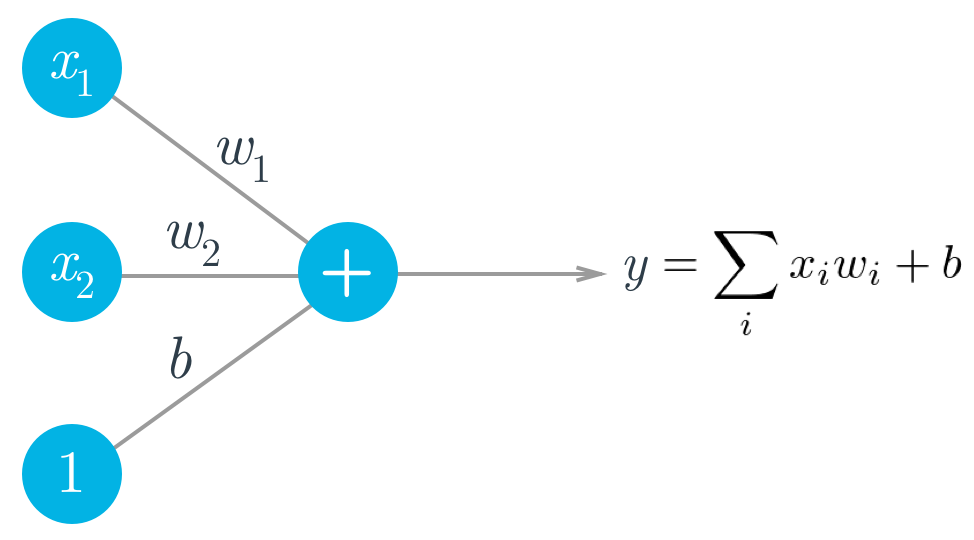

In [14]:
from IPython.display import Image
Image(filename='neuron.png') 

In [11]:
"""
Write the Linear#forward method below!
"""


class Node:
    def __init__(self, inbound_nodes=[]):
        # Nodes from which this Node receives values
        self.inbound_nodes = inbound_nodes
        # Nodes to which this Node passes values
        self.outbound_nodes = []
        # A calculated value
        self.value = None
        # Add this node as an outbound node on its inputs.
        for n in self.inbound_nodes:
            n.outbound_nodes.append(self)

    # These will be implemented in a subclass.
    def forward(self):
        """
        Forward propagation.

        Compute the output value based on `inbound_nodes` and
        store the result in self.value.
        """
        raise NotImplemented


class Input(Node):
    def __init__(self):
        # An Input Node has no inbound nodes,
        # so no need to pass anything to the Node instantiator
        Node.__init__(self)

        # NOTE: Input Node is the only Node where the value
        # may be passed as an argument to forward().
        #
        # All other Node implementations should get the value
        # of the previous nodes from self.inbound_nodes
        #
        # Example:
        # val0 = self.inbound_nodes[0].value
    def forward(self, value=None):
        # Overwrite the value if one is passed in.
        if value is not None:
            self.value = value


class Linear(Node):
    def __init__(self, inputs, weights, bias):
        Node.__init__(self, [inputs, weights, bias])

        # NOTE: The weights and bias properties here are not
        # numbers, but rather references to other nodes.
        # The weight and bias values are stored within the
        # respective nodes.

    def forward(self):
        """
        Set self.value to the value of the linear function output.

        Your code goes here!
        """
        inputs = self.inbound_nodes[0].value
        weights = self.inbound_nodes[1].value
        bias = self.inbound_nodes[2]
        self.value = bias.value
        for x, w in zip(inputs, weights):
            self.value += x * w


def topological_sort(feed_dict):
    """
    Sort the nodes in topological order using Kahn's Algorithm.

    `feed_dict`: A dictionary where the key is a `Input` Node and the value is the respective value feed to that Node.

    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outbound_nodes:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]

        L.append(n)
        for m in n.outbound_nodes:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L


def forward_pass(output_node, sorted_nodes):
    """
    Performs a forward pass through a list of sorted nodes.

    Arguments:

        `output_node`: A node in the graph, should be the output node (have no outgoing edges).
        `sorted_nodes`: A topologically sorted list of nodes.

    Returns the output Node's value
    """

    for n in sorted_nodes:
        n.forward()

    return output_node.value


In [12]:
"""
NOTE: Here we're using an Input node for more than a scalar.
In the case of weights and inputs the value of the Input node is
actually a python list!

In general, there's no restriction on the values that can be passed to an Input node.
"""
# from miniflow import *

inputs, weights, bias = Input(), Input(), Input()

f = Linear(inputs, weights, bias)

feed_dict = {
    inputs: [6, 14, 3],
    weights: [0.5, 0.25, 1.4],
    bias: 2
}

graph = topological_sort(feed_dict)
output = forward_pass(f, graph)

print(output) # should be 12.7 with this example

12.7


In the solution, I set self.value to the bias and then loop through the inputs and weights, adding each weighted input to self.value. Notice calling .value on self.inbound_nodes[0] or self.inbound_nodes[1] gives us a list.

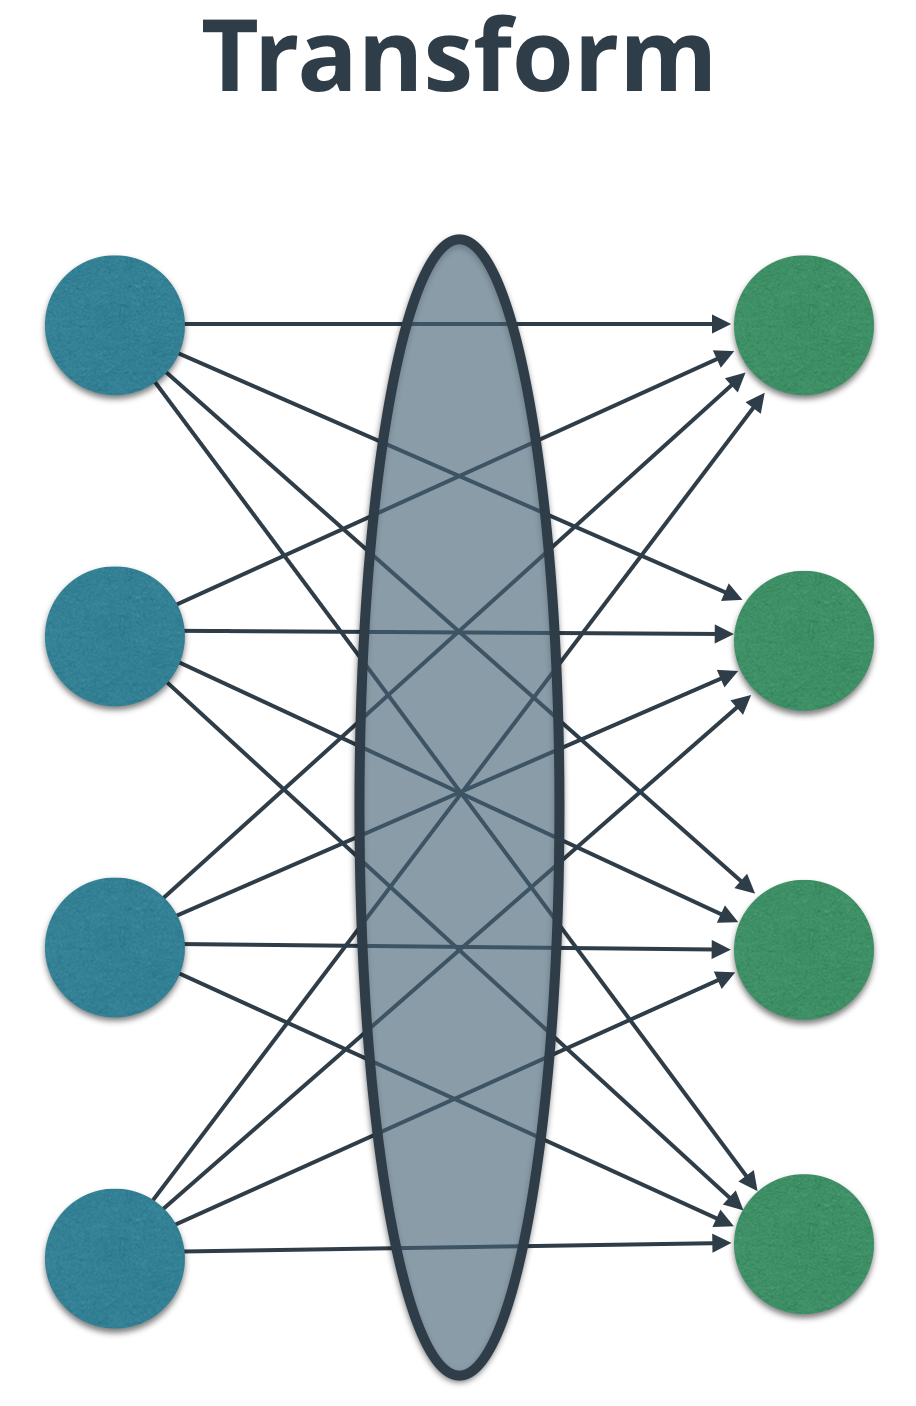

In [16]:
from IPython.display import Image
Image(filename='screen-shot-2016-10-21-at-15.43.05.png')

Shift your thinking here to the edges between layers.

Linear algebra nicely reflects the idea of transforming values between layers in a graph. In fact, the concept of a transform does exactly what a layer should do - it converts inputs to outputs in many dimensions.

Let's go back to our equation for the output.

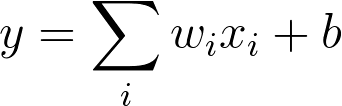

In [17]:
from IPython.display import Image
Image(filename='neuron-output.png')

For the rest of this section we'll denote x as X and w as W since they are now matrices, and b is now a vector instead of a scalar.

Consider a Linear node with 1 input and k outputs (mapping 1 input to k outputs). In this context an input/output is synonymous with a feature.

In this case X is a 1 by 1 matrix.

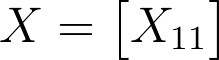

In [18]:
from IPython.display import Image
Image(filename='newx.png')

1 by 1 matrix, 1 element.

W becomes a 1 by k matrix (looks like a row).

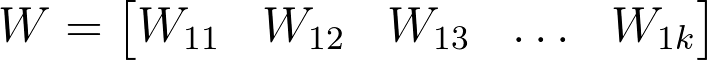

In [20]:
from IPython.display import Image
Image(filename='neww.png')

A 1 by k weights row matrix.

The result of the matrix multiplication of X and W is a 1 by k matrix. Since b is also a 1 by k row matrix (1 bias per output), b is added to the output of the X and W matrix multiplication.

What if we are mapping n inputs to k outputs?

Then X is now a 1 by n matrix and W is a n by k matrix. The result of the matrix multiplication is still a 1 by k matrix so the use of the biases remain the same.

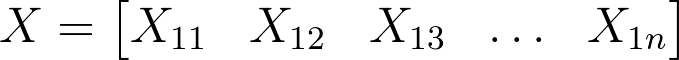

In [21]:
from IPython.display import Image
Image(filename='newx-1n.png')

X is now a 1 by n matrix, n inputs/features.

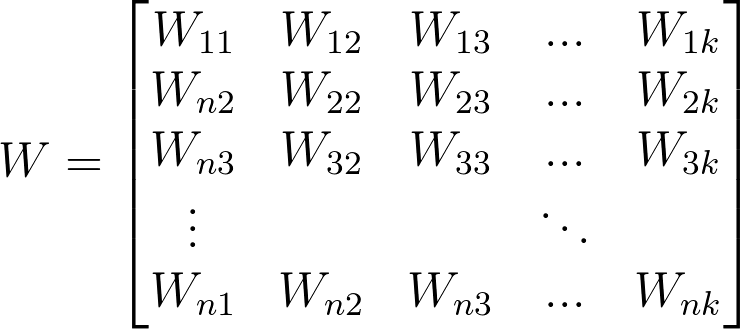

In [22]:
from IPython.display import Image
Image(filename='neww-nk.png')

W is now a n by k matrix.

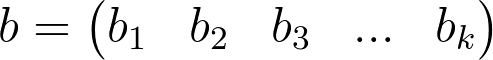

In [23]:
from IPython.display import Image
Image(filename='b-1byk.png')

Row matrix of biases, one for each output.

n practice, it's common to feed in multiple data examples in each forward pass rather than just 1. The reasoning for this is the examples can be processed in parallel, resulting in big performance gains. The number of examples is called the batch size. Common numbers for the batch size are 32, 64, 128, 256, 512. Generally, it's the most we can comfortably fit in memory.

What does this mean for X, W and b?

X becomes a m by n matrix and W and b remain the same. The result of the matrix multiplication is now m by k, so the addition of b is broadcast over each row.

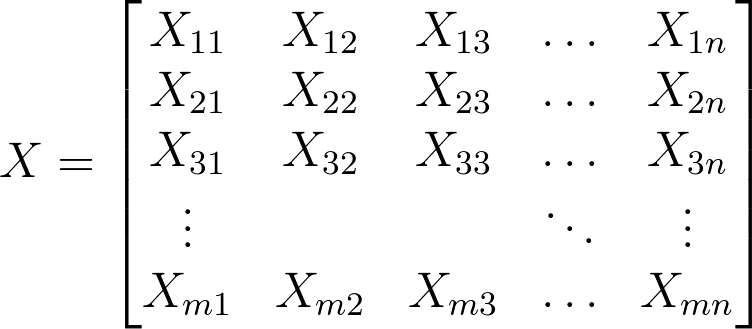

In [24]:
from IPython.display import Image
Image(filename='x-mn.png')

X is now an m by n matrix. Each row has n inputs/features.

In the context of MNIST each row of X is an image reshaped from 28 by 28 to 1 by 784.

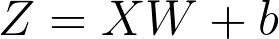

In [25]:
from IPython.display import Image
Image(filename='z.png')

Equation (2)

Equation (2) can also be viewed as Z = XW + B where B is the biases vector, b, stacked m times as a row. Due to broadcasting it's abbreviated to Z = XW + b.
I want you to rebuild Linear to handle matrices and vectors using the venerable Python math package numpy to make your life easier. numpy is often abbreviated as np, so we'll refer to it as np when referring to code.

I used np.array (documentation) to create the matrices and vectors. You'll want to use np.dot, which functions as matrix multiplication for 2D arrays (documentation), to multiply the input and weights matrices from Equation (2). It's also worth noting that numpy actually overloads the __add__ operator so you can use it directly with np.array (eg. np.array() + np.array()).

Instructions
Open nn.py. See how the neural network implements the Linear node.
Open miniflow.py. Implement Equation (2) within the forward pass for the Linear node.
Test your work!

In [26]:
"""
Modify Linear#forward so that it linearly transforms
input matrices, weights matrices and a bias vector to
an output.
"""

import numpy as np


class Node(object):
    def __init__(self, inbound_nodes=[]):
        self.inbound_nodes = inbound_nodes
        self.value = None
        self.outbound_nodes = []
        for node in inbound_nodes:
            node.outbound_nodes.append(self)

    def forward():
        raise NotImplementedError


class Input(Node):
    """
    While it may be strange to consider an input a node when
    an input is only an individual node in a node, for the sake
    of simpler code we'll still use Node as the base class.

    Think of Input as collating many individual input nodes into
    a Node.
    """
    def __init__(self):
        # An Input node has no inbound nodes,
        # so no need to pass anything to the Node instantiator
        Node.__init__(self)

    def forward(self):
        # Do nothing because nothing is calculated.
        pass


class Linear(Node):
    def __init__(self, X, W, b):
        # Notice the ordering of the input nodes passed to the
        # Node constructor.
        Node.__init__(self, [X, W, b])

    def forward(self):
        """
        Set the value of this node to the linear transform output.

        Your code goes here!
        """
        X = self.inbound_nodes[0].value
        W = self.inbound_nodes[1].value
        b = self.inbound_nodes[2].value
        self.value = np.dot(X, W) + b


def topological_sort(feed_dict):
    """
    Sort the nodes in topological order using Kahn's Algorithm.

    `feed_dict`: A dictionary where the key is a `Input` Node and the value is the respective value feed to that Node.

    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outbound_nodes:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]

        L.append(n)
        for m in n.outbound_nodes:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L


def forward_pass(output_node, sorted_nodes):
    """
    Performs a forward pass through a list of sorted Nodes.

    Arguments:

        `output_node`: A Node in the graph, should be the output node (have no outgoing edges).
        `sorted_nodes`: a topologically sorted list of nodes.

    Returns the output node's value
    """

    for n in sorted_nodes:
        n.forward()

    return output_node.value

In [27]:
"""
The setup is similar to the prevous `Linear` node you wrote
except you're now using NumPy arrays instead of python lists.

Update the Linear class in miniflow.py to work with
numpy vectors (arrays) and matrices.

Test your code here!
"""

import numpy as np
#from miniflow import *

X, W, b = Input(), Input(), Input()

f = Linear(X, W, b)

X_ = np.array([[-1., -2.], [-1, -2]])
W_ = np.array([[2., -3], [2., -3]])
b_ = np.array([-3., -5])

feed_dict = {X: X_, W: W_, b: b_}

graph = topological_sort(feed_dict)
output = forward_pass(f, graph)

"""
Output should be:
[[-9., 4.],
[-9., 4.]]
"""
print(output)

[[-9.  4.]
 [-9.  4.]]


## Answer

In [ ]:
class Linear(Node):
    def __init__(self, X, W, b):
        # Notice the ordering of the inputs passed to the
        # Node constructor.
        Node.__init__(self, [X, W, b])

    def forward(self):
        X = self.inbound_nodes[0].value
        W = self.inbound_nodes[1].value
        b = self.inbound_nodes[2].value
        self.value = np.dot(X, W) + b

Nothing fancy in my solution. I pulled the value of the X, W and b from their respective inputs. I used np.dot to handle the matrix multiplication.

Neural networks take advantage of alternating transforms and activation functions to better categorize outputs. The sigmoid function is among the most common activation functions.

# Sigmoid Function

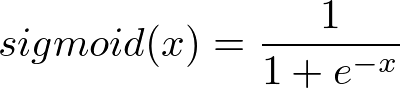

In [29]:
from IPython.display import Image
Image(filename='19.png')

Equation (3)

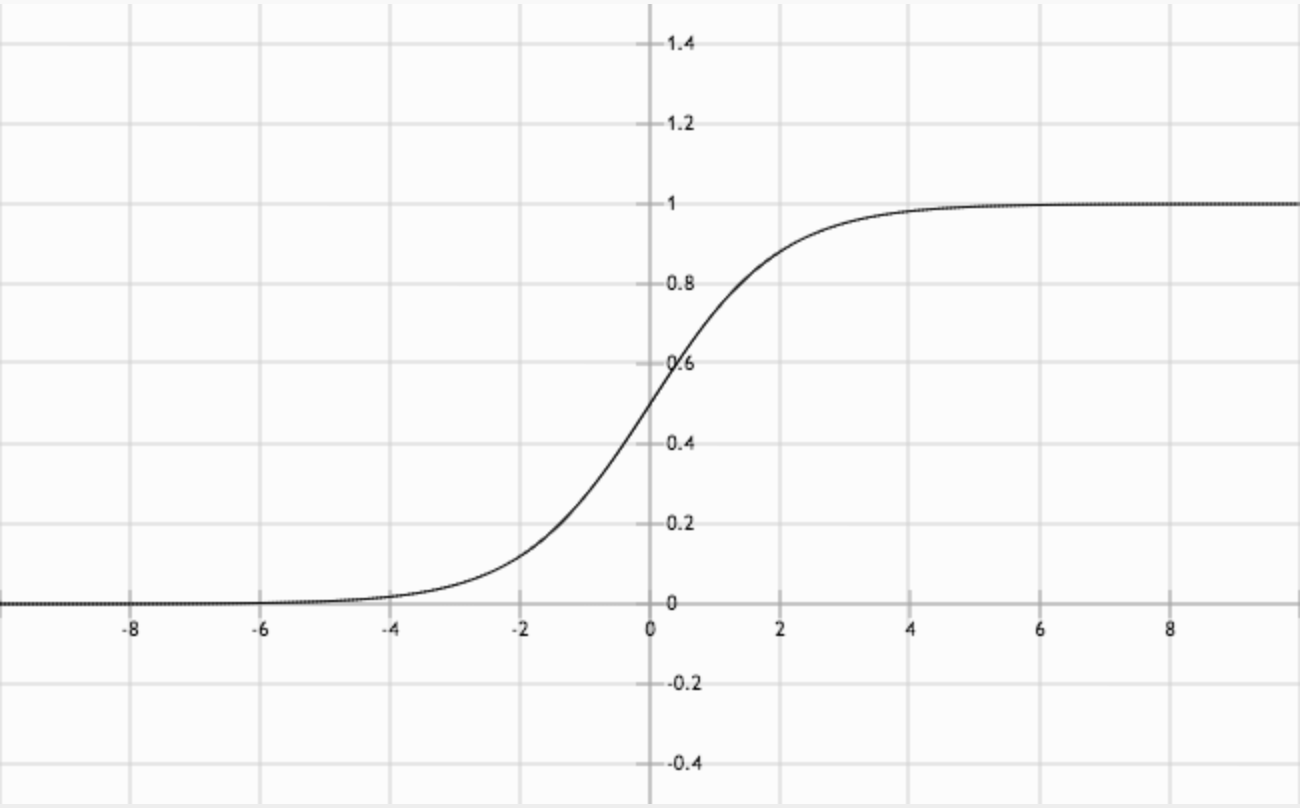

In [31]:
from IPython.display import Image
Image(filename='pasted-image-at-2016-10-25-01-17-pm.png')

Graph of the sigmoid function. Notice the "S" shape.

Linear transforms are great for simply shifting values, but neural networks often require a more nuanced transform. For instance, one of the original designs for an artificial neuron, the perceptron, exhibit binary output behavior. Perceptrons compare a weighted input to a threshold. When the weighted input exceeds the threshold, the perceptron is activated and outputs 1, otherwise it outputs 0.

You could model a perceptron's behavior as a step function.

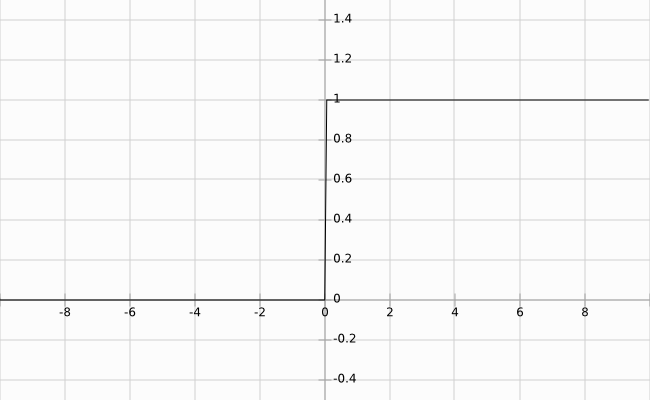

In [32]:
from IPython.display import Image
Image(filename='save-2.png')

Example of a step function (The jump between y = 0 and y = 1 should be instantaneous).

Activation, the idea of binary output behavior, generally makes sense for classification problems. For example, if you ask the network to hypothesize if a handwritten image is a '9', you're effectively asking for a binary output - yes, this is a '9', or no, this is not a '9'. A step function is the starkest form of a binary output, which is great, but step functions are not continuous and not differentiable, which is very bad. Differentiation is what makes gradient descent possible.

The sigmoid function, Equation (3) above, replaces thresholding with a beautiful S-shaped curve (also shown above) that mimics the activation behavior of a perceptron while maintaining continuity, and thus differentiability. As a bonus, the sigmoid function has a very simple derivative that looks remarkably similar to the sigmoid itself.

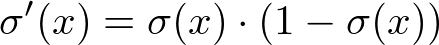

In [33]:
from IPython.display import Image
Image(filename='21.png')

Equation (4). σ represents Equation (3)

Notice that the sigmoid function only has one parameter. Remember that sigmoid is an activation function (non-linearity), meaning it takes a single input and performs a mathematical operation on it.

Conceptually, the sigmoid function makes decisions. When given weighted features from some data, it indicates whether or not the features contribute to a classification. In that way, a sigmoid activation works well following a linear transformation. As it stands right now with random weights and bias, the sigmoid node's output is also random. The process of learning through backpropagation and gradient descent, which you will implement soon, modifies the weights and bias such that activation of the sigmoid node begins to match expected outputs.
Now that I've given you the equation for the sigmoid function, I want you to add it to the MiniFlow library. To do so, you'll want to use np.exp (documentation) to make your life much easier.

You'll be using Sigmoid in conjunction with Linear. Here's how it should look:

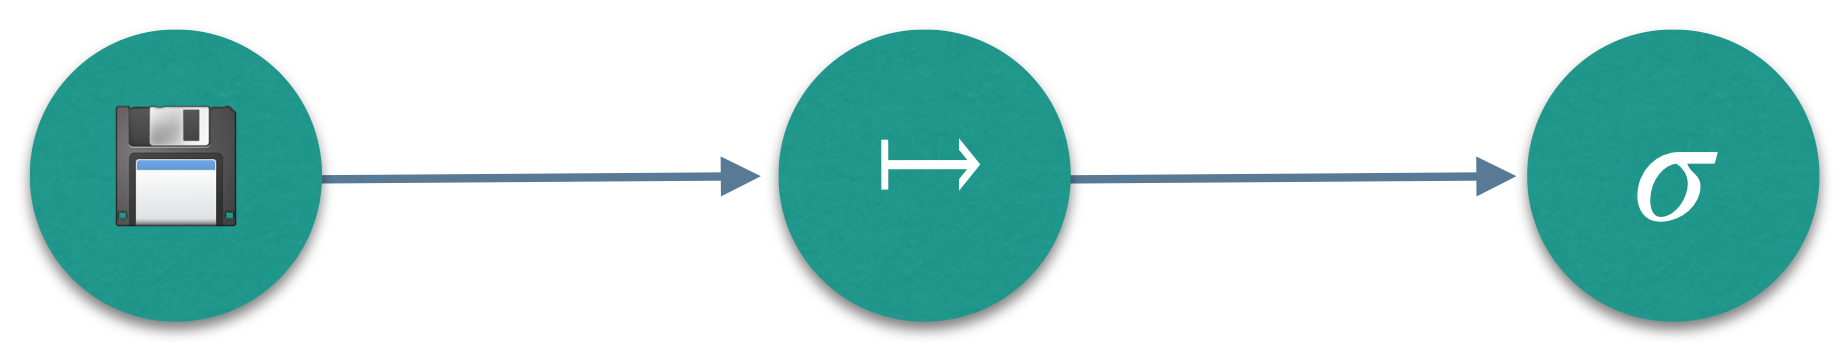

In [34]:
from IPython.display import Image
Image(filename='screen-shot-2016-10-26-at-19.28.34.png')

Inputs > Linear Transform > Sigmoid

Instructions
Open nn.py to see how the network will use Sigmoid.
Open miniflow.py. Modify the forward method of the Sigmoid class to reflect the sigmoid function's behavior.
Test your work! Hit "Submit" when your Sigmoid works as expected.

In [35]:
"""
Fix the Sigmoid class so that it computes the sigmoid function
on the forward pass!

Scroll down to get started.
"""

import numpy as np

class Node(object):
    def __init__(self, inbound_nodes=[]):
        self.inbound_nodes = inbound_nodes
        self.value = None
        self.outbound_nodes = []
        for node in inbound_nodes:
            node.outbound_nodes.append(self)

    def forward():
        raise NotImplementedError


class Input(Node):
    def __init__(self):
        # An Input node has no inbound nodes,
        # so no need to pass anything to the Node instantiator
        Node.__init__(self)

    def forward(self):
        # Do nothing because nothing is calculated.
        pass


class Linear(Node):
    def __init__(self, X, W, b):
        # Notice the ordering of the input nodes passed to the
        # Node constructor.
        Node.__init__(self, [X, W, b])

    def forward(self):
        X = self.inbound_nodes[0].value
        W = self.inbound_nodes[1].value
        b = self.inbound_nodes[2].value
        self.value = np.dot(X, W) + b


class Sigmoid(Node):
    """
    You need to fix the `_sigmoid` and `forward` methods.
    """
    def __init__(self, node):
        Node.__init__(self, [node])

    def _sigmoid(self, x):
        """
        This method is separate from `forward` because it
        will be used later with `backward` as well.

        `x`: A numpy array-like object.

        Return the result of the sigmoid function.

        Your code here!
        """
        return 1. / (1. + np.exp(-x)) # the `.` ensures that `1` is a float


    def forward(self):
        """
        Set the value of this node to the result of the
        sigmoid function, `_sigmoid`.

        Your code here!
        """
        # This is a dummy value to prevent numpy errors
        # if you test without changing this method.
        #self.value = -1
        input_value = self.inbound_nodes[0].value
        self.value = self._sigmoid(input_value)


def topological_sort(feed_dict):
    """
    Sort the nodes in topological order using Kahn's Algorithm.

    `feed_dict`: A dictionary where the key is a `Input` Node and the value is the respective value feed to that Node.

    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outbound_nodes:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]

        L.append(n)
        for m in n.outbound_nodes:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L


def forward_pass(output_node, sorted_nodes):
    """
    Performs a forward pass through a list of sorted Nodes.

    Arguments:

        `output_node`: A Node in the graph, should be the output node (have no outgoing edges).
        `sorted_nodes`: a topologically sorted list of nodes.

    Returns the output node's value
    """

    for n in sorted_nodes:
        n.forward()

    return output_node.value


In [36]:
"""
This network feeds the output of a linear transform
to the sigmoid function.

Finish implementing the Sigmoid class in miniflow.py!

Feel free to play around with this network, too!
"""

import numpy as np
#from miniflow import *

X, W, b = Input(), Input(), Input()

f = Linear(X, W, b)
g = Sigmoid(f)

X_ = np.array([[-1., -2.], [-1, -2]])
W_ = np.array([[2., -3], [2., -3]])
b_ = np.array([-3., -5])

feed_dict = {X: X_, W: W_, b: b_}

graph = topological_sort(feed_dict)
output = forward_pass(g, graph)

"""
Output should be:
[[  1.23394576e-04   9.82013790e-01]
 [  1.23394576e-04   9.82013790e-01]]
"""
print(output)

[[  1.23394576e-04   9.82013790e-01]
 [  1.23394576e-04   9.82013790e-01]]


Here's how I implemented the sigmoid function.

In [ ]:
class Sigmoid(Node):
    def __init__(self, node):
        Node.__init__(self, [node])

    def _sigmoid(self, x):
        """
        This method is separate from `forward` because it
        will be used with `backward` as well.

        `x`: A numpy array-like object.
        """
        return 1. / (1. + np.exp(-x)) # the `.` ensures that `1` is a float

    def forward(self):
        input_value = self.inbound_nodes[0].value
        self.value = self._sigmoid(input_value)

It may have seemed strange that _sigmoid was a separate method. As seen in the derivative of the sigmoid function, Equation (4), the sigmoid function is actually a part of its own derivative. Keeping _sigmoid separate means you won't have to implement it twice for forward and backward propagations.

This is exciting! At this point, you have used weights and biases to compute outputs. And you've used an activation function to categorize the output. As you may recall, neural networks improve the accuracy of their outputs by modifying weights and biases in response to training against labeled datasets.
There are many techniques for defining the accuracy of a neural network, all of which center on the network's ability to produce values that come as close as possible to known correct values. People use different names for this accuracy measurement, often terming it loss or cost. I'll use the term cost most often.

For this lab, you will calculate the cost using the mean squared error (MSE). It looks like so:

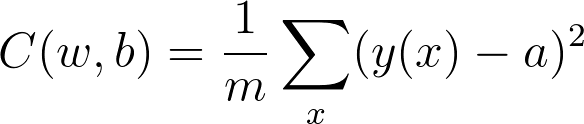

In [37]:
from IPython.display import Image
Image(filename='codecogseqn.png')

Equation (5)

Here w denotes the collection of all weights in the network, b all the biases, m is the total number of training examples, a is the approximation of y(x) by the network, both a and y(x) are vectors of the same length.

The collection of weights is all the weight matrices flattened into vectors and concatenated to one big vector. The same goes for the collection of biases except they're already vectors so there's no need to flatten them prior to the concatenation.

Here's an example of creating w in code:

In [ ]:
# 2 by 2 matrices
w1  = np.array([[1, 2], [3, 4]])
w2  = np.array([[5, 6], [7, 8]])

# flatten
w1_flat = np.reshape(w1, -1)
w2_flat = np.reshape(w2, -1)

w = np.concatenate((w1_flat, w2_flat))
# array([1, 2, 3, 4, 5, 6, 7, 8])

It's a nice way to abstract all the weights and biases used in the neural network and makes some things easier to write as we'll see soon in the upcoming gradient descent sections.

NOTE: It's not required you do this in your code! It's just easier to do this talk about the weights and biases as a collective than consider them invidually.

The cost, C, depends on the difference between the correct output, y(x), and the network's output, a. It's easy to see that no difference between y(x) and a (for all values of x) leads to a cost of 0.

This is the ideal situation, and in fact the learning process revolves around minimizing the cost as much as possible.

I want you to calculate the cost now.

You implemented this network in the forward direction in the last quiz.

As it stands right now, it outputs gibberish. The activation of the sigmoid node means nothing because the network has no labeled output against which to compare. Furthermore, the weights and bias cannot change and learning cannot happen without a cost.

Instructions
For this quiz, you will run the forward pass against the network in nn.py. I want you to finish implementing the MSE method so that it calculates the cost from the equation above.

I recommend using the np.square (documentation) method to make your life easier.

Check out nn.py to see how MSE will calculate the cost.
Open miniflow.py. Finish building MSE.
Test your network! See if the cost makes sense given the inputs by playing with nn.py.

In [ ]:
import numpy as np


class Node(object):
    """
    Base class for nodes in the network.

    Arguments:

        `inbound_nodes`: A list of nodes with edges into this node.
    """
    def __init__(self, inbound_nodes=[]):
        """
        Node's constructor (runs when the object is instantiated). Sets
        properties that all nodes need.
        """
        # A list of nodes with edges into this node.
        self.inbound_nodes = inbound_nodes
        # The eventual value of this node. Set by running
        # the forward() method.
        self.value = None
        # A list of nodes that this node outputs to.
        self.outbound_nodes = []
        # Sets this node as an outbound node for all of
        # this node's inputs.
        for node in inbound_nodes:
            node.outbound_nodes.append(self)

    def forward(self):
        """
        Every node that uses this class as a base class will
        need to define its own `forward` method.
        """
        raise NotImplementedError


class Input(Node):
    """
    A generic input into the network.
    """
    def __init__(self):
        # The base class constructor has to run to set all
        # the properties here.
        #
        # The most important property on an Input is value.
        # self.value is set during `topological_sort` later.
        Node.__init__(self)

    def forward(self):
        # Do nothing because nothing is calculated.
        pass


class Linear(Node):
    """
    Represents a node that performs a linear transform.
    """
    def __init__(self, X, W, b):
        # The base class (Node) constructor. Weights and bias
        # are treated like inbound nodes.
        Node.__init__(self, [X, W, b])

    def forward(self):
        """
        Performs the math behind a linear transform.
        """
        X = self.inbound_nodes[0].value
        W = self.inbound_nodes[1].value
        b = self.inbound_nodes[2].value
        self.value = np.dot(X, W) + b


class Sigmoid(Node):
    """
    Represents a node that performs the sigmoid activation function.
    """
    def __init__(self, node):
        # The base class constructor.
        Node.__init__(self, [node])

    def _sigmoid(self, x):
        """
        This method is separate from `forward` because it
        will be used with `backward` as well.

        `x`: A numpy array-like object.
        """
        return 1. / (1. + np.exp(-x))

    def forward(self):
        """
        Perform the sigmoid function and set the value.
        """
        input_value = self.inbound_nodes[0].value
        self.value = self._sigmoid(input_value)


class MSE(Node):
    def __init__(self, y, a):
        """
        The mean squared error cost function.
        Should be used as the last node for a network.
        """
        # Call the base class' constructor.
        Node.__init__(self, [y, a])

    def forward(self):
        """
        Calculates the mean squared error.
        """
        # NOTE: We reshape these to avoid possible matrix/vector broadcast
        # errors.
        #
        # For example, if we subtract an array of shape (3,) from an array of shape
        # (3,1) we get an array of shape(3,3) as the result when we want
        # an array of shape (3,1) instead.
        #
        # Making both arrays (3,1) insures the result is (3,1) and does
        # an elementwise subtraction as expected.
        #pass
        y = self.inbound_nodes[0].value.reshape(-1, 1)
        a = self.inbound_nodes[1].value.reshape(-1, 1)
        m = self.inbound_nodes[0].value.shape[0]

        diff = y - a
        self.value = np.mean(diff**2)


def topological_sort(feed_dict):
    """
    Sort the nodes in topological order using Kahn's Algorithm.

    `feed_dict`: A dictionary where the key is a `Input` Node and the value is the respective value feed to that Node.

    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outbound_nodes:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]

        L.append(n)
        for m in n.outbound_nodes:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L


def forward_pass(graph):
    """
    Performs a forward pass through a list of sorted Nodes.

    Arguments:

        `graph`: The result of calling `topological_sort`.
    """
    # Forward pass
    for n in graph:
        n.forward()


In [ ]:
"""
Test your MSE method with this script!

No changes necessary, but feel free to play
with this script to test your network.
"""

import numpy as np
from miniflow import *

y, a = Input(), Input()
cost = MSE(y, a)

y_ = np.array([1, 2, 3])
a_ = np.array([4.5, 5, 10])

feed_dict = {y: y_, a: a_}
graph = topological_sort(feed_dict)
# forward pass
forward_pass(graph)

"""
Expected output

23.4166666667
"""
print(cost.value)


Here's how I implemented MSE:

In [ ]:
class MSE(Node):
    def __init__(self, y, a):
        """
        The mean squared error cost function.
        Should be used as the last node for a network.
        """
        # Call the base class' constructor.
        Node.__init__(self, [y, a])

    def forward(self):
        """
        Calculates the mean squared error.
        """
        # NOTE: We reshape these to avoid possible matrix/vector broadcast
        # errors.
        #
        # For example, if we subtract an array of shape (3,) from an array of shape
        # (3,1) we get an array of shape(3,3) as the result when we want
        # an array of shape (3,1) instead.
        #
        # Making both arrays (3,1) insures the result is (3,1) and does
        # an elementwise subtraction as expected.
        y = self.inbound_nodes[0].value.reshape(-1, 1)
        a = self.inbound_nodes[1].value.reshape(-1, 1)
        m = self.inbound_nodes[0].value.shape[0]

        diff = y - a
        self.value = np.mean(diff**2)

The math behind MSE reflects Equation (5), where y is target output and a is output computed by the neural network. We then square the difference diff**2, alternatively, this could be np.square(diff). Lastly we need to sum the squared differences and divide by the total number of examples m. This can be achieved in with np.mean or (1 /m) * np.sum(diff**2).

Note the order of y and a doesn't actually matter, we could switch them around (a - y) and get the same value.

# Journey to the Bottom of the Valley
Here I'll give you a little refresher on gradient descent so we can start training our network with MiniFlow. Remember that our goal is to make our network output as close as possible to the target values by minimizing the cost. You can envision the cost as a hill or mountain and we want to get to the bottom.

Imagine your model parameters are represented by a ball sitting on a hill. Intuitively, we want to push the ball downhill. And that makes sense, but when we're talking about our cost function, how do we know which way is downhill?

Luckily, the gradient provides this exact information.

Technically, the gradient actually points uphill, in the direction of steepest ascent. But if we put a - sign in front of this value, we get the direction of steepest descent, which is what we want.

You'll learn more about the gradient in a moment, but, for now, just think of it as a vector of numbers. Each number represents the amount by which we should adjust a corresponding weight or bias in the neural network. Adjusting all of the weights and biases by the gradient values reduces the cost (or error) of the network.

Got all that?

Great! Now we know where to push the ball. The next thing to consider is how much force should be applied to the push. This is known as the learning rate, which is an apt name since this value determines how quickly or slowly the neural network learns.

You might be tempted to set a really big learning rate, so the network learns really fast, right?

Be careful! If the value is too large you could overshoot the target and eventually diverge. Yikes!

<img src="gradient-descent-convergence.gif">

Convergence. This is the ideal behaviour.

<img src="gradient-descent-divergence.gif">

Divergence. This can happen when the learning rate is too large.

So what is a good learning rate, then?

This is more of a guessing game than anything else but empirically values in the range 0.1 to 0.0001 work well. The range 0.001 to 0.0001 is popular, as 0.1 and 0.01 are sometimes too large.

Here's the formula for gradient descent (pseudocode):

In [ ]:
x = x - learning_rate * gradient_of_x

x is a parameter used by the neural network (i.e. a single weight or bias).

We multiply gradient_of_x (the uphill direction) by learning_rate (the force of the push) and then subtract that from x to make the push go downhill.

Awesome! Time to apply all this in a quiz.
Setup
For this quiz you'll complete TODOs in both the f.py and gd.py files.

Tasks:

Set the learning_rate in f.py.
Complete the gradient descent implementation in gradient_descent_update function in gd.py.
Notes:

Setting the learning_rate to 0.1 should result in x -> 0 and f(x) -> 5 if you've implemented gradient descent correctly.
Play around with different values for the learning rate. Try very small values, values close to 1, above 1, etc. What happens?

In [ ]:
def gradient_descent_update(x, gradx, learning_rate):
    """
    Performs a gradient descent update.
    # TODO: Implement Gradient Descent
    """
    x = x - learning_rate * gradx
    # Return the new value for x
    return x
#import f

In [ ]:
"""
Given the starting point of any `x` gradient descent
should be able to find the minimum value of x for the
cost function `f` defined below.
"""
import random
from gd import gradient_descent_update


def f(x):
    """
    Quadratic function.

    It's easy to see the minimum value of the function
    is 5 when is x=0.
    """
    return x**2 + 5


def df(x):
    """
    Derivative of `f` with respect to `x`.
    """
    return 2*x


# Random number better 0 and 10,000. Feel free to set x whatever you like.
x = random.randint(0, 10000)
# TODO: Set the learning rate
learning_rate = 0.001
epochs = 100

for i in range(epochs+1):
    cost = f(x)
    gradx = df(x)
    print("EPOCH {}: Cost = {:.3f}, x = {:.3f}".format(i, cost, gradx))
    x = gradient_descent_update(x, gradx, learning_rate)


# Gradient Descent Solution

In [ ]:
def gradient_descent_update(x, gradx, learning_rate):
    """
    Performs a gradient descent update.
    """
    x = x - learning_rate * gradx
    # Return the new value for x
    return x

We adjust the old x pushing it in the direction of gradx with the force learning_rate. Subtracting learning_rate * gradx. Remember the gradient is initially in the direction of steepest ascent so subtracting learning_rate * gradx from x turns it into steepest descent. You can make sure of this yourself by replacing the subtraction with an addition.


# The Gradient & Backpropagation
Now that we know how to update our weights and biases using the gradient, we need to figure out how to calculate the gradients for all of our nodes. For each node, we'll want to change the values based on the gradient of the cost with respect to the value of that node. In this way, the gradient descent updates we make will eventually converge to the minimum of the cost.

Let's consider a network with a linear node l
​1
​​ , a sigmoid node s, and another linear node l
​2
​​ , followed by an MSE node to calculate the cost, C.

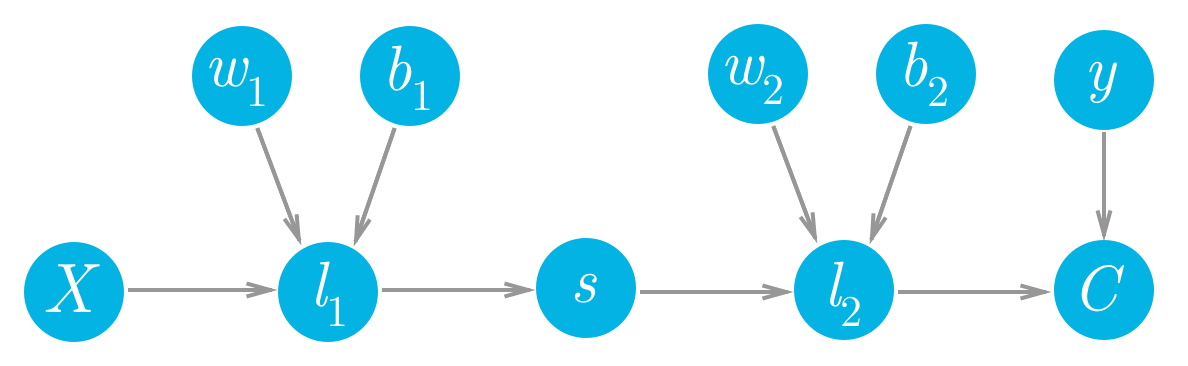

In [40]:
from IPython.display import Image
Image(filename="two-layer-graph.png") 

Forward pass for a simple two layer network.

Writing this out in MiniFlow, it would look like:

In [ ]:
X, y = Input(), Input()
W1, b1 = Input(), Input()
W2, b2 = Input(), Input()

l1 = Linear(X, W1, b1)
s = Sigmoid(l1)
l2 = Linear(s, W2, b2)
cost = MSE(l2, y)

We can see that each of the values of these nodes flows forwards and eventually produces the cost C. For example, the value of the second linear node l
​2
​​  goes into the cost node and determines the value of that node. Accordingly, a change in l
​2
​​  will produce a change in C. We can write this relationship between the changes as a gradient,

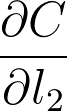

In [41]:
from IPython.display import Image
Image(filename="dcdl2.png") 

This is what a gradient means, it's a slope, how much you change the cost ∂C given a change in l
​2
​​ , ∂l
​2
​​ . So a node with a larger gradient with respect to the cost is going to contribute a larger change to the cost. In this way, we can assign blame for the cost to each node. The larger the gradient for a node, the more blame it gets for the final cost. And the more blame a node has, the more we'll update it in the gradient descent step.

If we want to update one of the weights with gradient descent, we'll need the gradient of the cost with respect to those weights. Let's see how we can use this framework to find the gradient for the weights in the second layer, w
​2
​​ . We want to calculate the gradient of C with respect to w
​2
​​ :

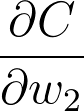

In [42]:
from IPython.display import Image
Image(filename="dcdw2.png") 

We can see in the graph that w
​2
​​  is connected to l
​2
​​ , so a change in w
​2
​​  is going to create a change in l
​2
​​  which then creates a change in C. We can assign blame to w
​2
​​  by sending the cost gradient back through the network. First you have how much l
​2
​​  affected C, then how much w
​2
​​  affected l
​2
​​ . Multiplying these gradients together gets you the total blame attributed to w
​2
​​ .

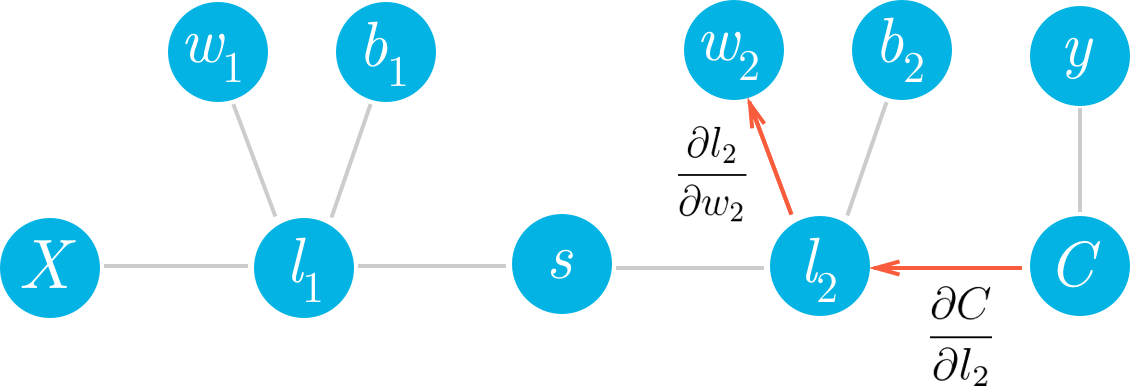

In [43]:
from IPython.display import Image
Image(filename="w2-backprop-graph.png") 

Pre-requisites
Below we're getting into the math behind backpropagation which requires multivariable calculus. If you need a refresher, I highly recommend checking out

Khan Academy's lessons on partial derivatives
Another video on gradients
And finally, using the chain rule
Continuing on
Multiplying these gradients is just an application of the chain rule:

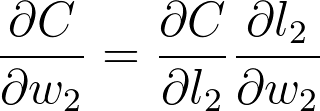

In [44]:
from IPython.display import Image
Image(filename="dcdw2-chain.png") 

You can see in the graph w
​2
​​ , l
​2
​​ , and C are chained together. Any change in w
​2
​​  will create a change in l
​2
​​  and the size of that change is given by the gradient ∂l
​2
​​ /∂w
​2
​​ . Now, since l
​2
​​  is changing this will cause a change in the cost C and the size of that change is given by the gradient ∂C/∂l
​2
​​ . You can think of the chain rule similarly to the domino effect, changing something in the network will propagate through it altering other nodes along the way.
If you think of the chain rule as normal fractions, you can see that ∂l
​2
​​  in the denominator and numerator cancel out and you get back ∂C/∂w
​2
​​  (although it doesn't exactly work like normal fractions, but it helps to keep track of things.) Okay, let's work out the gradient for w
​2
​​ . First, we need to know the gradient for l
​2
​​ .

As a reminder the cost is

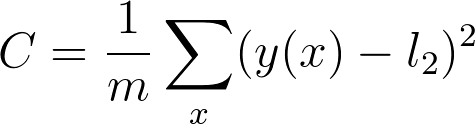

In [45]:
from IPython.display import Image
Image(filename="cost.png") 

And the value for the second linear node is

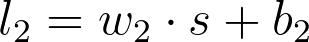

In [46]:
from IPython.display import Image
Image(filename="l2.png") 

where w
​2
​​ , s, and b
​2
​​  are all vectors and w
​2
​​ ⋅s means the dot product of w
​2
​​  and s.

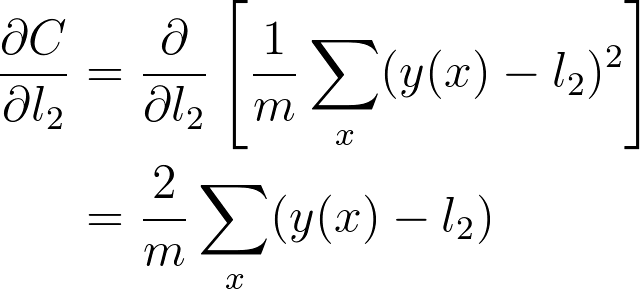

In [47]:
from IPython.display import Image
Image(filename="dcdl2-grad.png") 

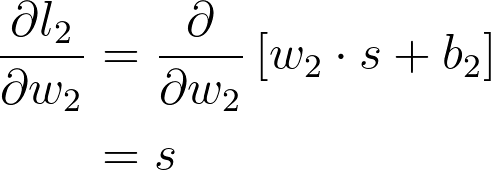

In [48]:
from IPython.display import Image
Image(filename="dl2dw2-grad.png") 

And putting these together, you get the gradient for w
​2
​​ 

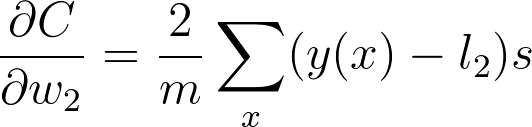

In [49]:
from IPython.display import Image
Image(filename="dcdw2-grad.png") 

This is the gradient you use in the gradient descent update for w
​2
​​ . You can see what we did here, we walked back through the graph and multiplied all the gradients we found along the way.
Now, let's go deeper and calculate the gradient for w
​1
​​ . Here we use the same method as before, walking backwards through the graph.

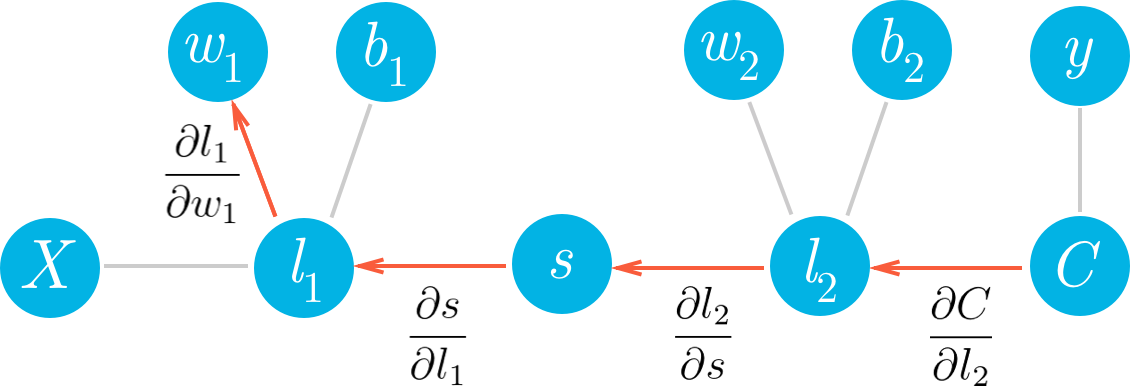

In [50]:
from IPython.display import Image
Image(filename="w1-backprop-graph.png") 

Hopefully it's clear now how to write out the gradient for w
​1
​​  just by looking at the graph. Using the chain rule, we'll write out the gradients for each node going backwards through the graph until we get to w
​1
​​ .

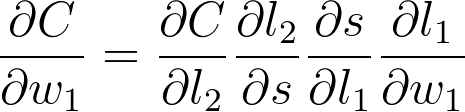

In [51]:
from IPython.display import Image
Image(filename="dcdw1-chain.png") 

Now we can start calculating each gradient in this expression to get the gradient for w
​1
​​ 

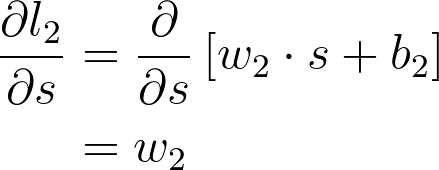

In [52]:
from IPython.display import Image
Image(filename="dl2ds-grad.png")

The next part is the gradient of the sigmoid function, s=f(l
​1
​​ ). Since we're using the logistic function here, the derivative can be written in terms of the sigmoid itself

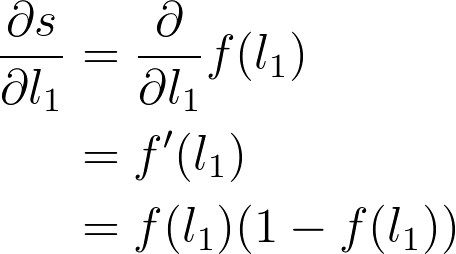

In [53]:
from IPython.display import Image
Image(filename="dsdl1.png")

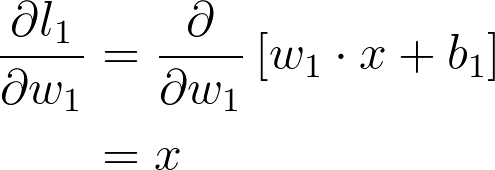

In [55]:
from IPython.display import Image
Image(filename="dl1dw1-grad.png")

Putting this all together, you get

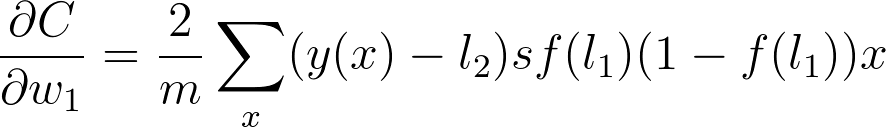

In [56]:
from IPython.display import Image
Image(filename="dcdw1-grad.png")

Now we can see a clear pattern. To find the gradient, you just multiply the gradients for all nodes in front of it going backwards from the cost. This is the idea behind backpropagation. The gradients are passed backwards through the network and used with gradient descent to update the weights and biases. If a node has multiple outgoing nodes, you just sum up the gradients from each node.

Implementing in MiniFlow
Let's think about how to translate this into MiniFlow. Looking at the graph, you see that each node gets the cost gradient from it's outbound nodes. For example, the node l
​1
​​  gets ∂C/∂l
​1
​​  through the sigmoid node, s. Then l
​1
​​  passes on the cost gradient to the weight node w
​1
​​ , but multiplied by ∂l
​1
​​ /∂w
​1
​​ , the gradient of l
​1
​​  with respect to it's input w
​1
​​ .

So, each node will pass on the cost gradient to its inbound nodes and each node will get the cost gradient from it's outbound nodes. Then, for each node we'll need to calculate a gradient that's the cost gradient times the gradient of that node with respect to its inputs. Below I've written out this process for a Linear node.

In [ ]:
# Initialize a partial for each of the inbound_nodes.
self.gradients = {n: np.zeros_like(n.value) for n in self.inbound_nodes}
# Cycle through the outputs. The gradient will change depending
# on each output, so the gradients are summed over all outputs.
for n in self.outbound_nodes:
    # Get the partial of the cost with respect to this node.
    grad_cost = n.gradients[self]
    # Set the partial of the loss with respect to this node's inputs.
    self.gradients[self.inbound_nodes[0]] += np.dot(grad_cost, self.inbound_nodes[1].value.T)
    # Set the partial of the loss with respect to this node's weights.
    self.gradients[self.inbound_nodes[1]] += np.dot(self.inbound_nodes[0].value.T, grad_cost)
    # Set the partial of the loss with respect to this node's bias.
    self.gradients[self.inbound_nodes[2]] += np.sum(grad_cost, axis=0, keepdims=False)

## New Code
There have been a couple of changes to MiniFlow since we last took it for a spin:

The first being the Node class now has a backward method, as well as a new attribute self.gradients, which is used to store and cache gradients during the backward pass.

In [ ]:
class Node(object):
    """
    Base class for nodes in the network.

    Arguments:

        `inbound_nodes`: A list of nodes with edges into this node.
    """
    def __init__(self, inbound_nodes=[]):
        """
        Node's constructor (runs when the object is instantiated). Sets
        properties that all nodes need.
        """
        # A list of nodes with edges into this node.
        self.inbound_nodes = inbound_nodes
        # The eventual value of this node. Set by running
        # the forward() method.
        self.value = None
        # A list of nodes that this node outputs to.
        self.outbound_nodes = []
        # New property! Keys are the inputs to this node and
        # their values are the partials of this node with
        # respect to that input.
        self.gradients = {}
        # Sets this node as an outbound node for all of
        # this node's inputs.
        for node in inbound_nodes:
            node.outbound_nodes.append(self)

    def forward(self):
        """
        Every node that uses this class as a base class will
        need to define its own `forward` method.
        """
        raise NotImplementedError

    def backward(self):
        """
        Every node that uses this class as a base class will
        need to define its own `backward` method.
        """
        raise NotImplementedError

The second change is to the helper function forward_pass(). That function has been replaced with forward_and_backward().

In [ ]:
def forward_and_backward(graph):
    """
    Performs a forward pass and a backward pass through a list of sorted nodes.

    Arguments:

        `graph`: The result of calling `topological_sort`.
    """
    # Forward pass
    for n in graph:
        n.forward()

    # Backward pass
    # see: https://docs.python.org/2.3/whatsnew/section-slices.html
    for n in graph[::-1]:
        n.backward()

Setup
Here's the derivative of the sigmoid function w.r.t x:

sigmoid(x)=1/(1+exp(−x))

​∂x
​
​∂sigmoid
​​ =sigmoid(x)∗(1−sigmoid(x))

Complete the implementation of backpropagation for the Sigmoid node by finishing the backward method in miniflow.py.
The backward methods for all other nodes have already been implemented. Taking a look at them might be helpful.

# QUIZ

In [57]:
"""
Implement the backward method of the Sigmoid node.
"""
import numpy as np


class Node(object):
    """
    Base class for nodes in the network.

    Arguments:

        `inbound_nodes`: A list of nodes with edges into this node.
    """
    def __init__(self, inbound_nodes=[]):
        """
        Node's constructor (runs when the object is instantiated). Sets
        properties that all nodes need.
        """
        # A list of nodes with edges into this node.
        self.inbound_nodes = inbound_nodes
        # The eventual value of this node. Set by running
        # the forward() method.
        self.value = None
        # A list of nodes that this node outputs to.
        self.outbound_nodes = []
        # New property! Keys are the inputs to this node and
        # their values are the partials of this node with
        # respect to that input.
        self.gradients = {}
        # Sets this node as an outbound node for all of
        # this node's inputs.
        for node in inbound_nodes:
            node.outbound_nodes.append(self)

    def forward(self):
        """
        Every node that uses this class as a base class will
        need to define its own `forward` method.
        """
        raise NotImplementedError

    def backward(self):
        """
        Every node that uses this class as a base class will
        need to define its own `backward` method.
        """
        raise NotImplementedError


class Input(Node):
    """
    A generic input into the network.
    """
    def __init__(self):
        # The base class constructor has to run to set all
        # the properties here.
        #
        # The most important property on an Input is value.
        # self.value is set during `topological_sort` later.
        Node.__init__(self)

    def forward(self):
        # Do nothing because nothing is calculated.
        pass

    def backward(self):
        # An Input node has no inputs so the gradient (derivative)
        # is zero.
        # The key, `self`, is reference to this object.
        self.gradients = {self: 0}
        # Weights and bias may be inputs, so you need to sum
        # the gradient from output gradients.
        for n in self.outbound_nodes:
            grad_cost = n.gradients[self]
            self.gradients[self] += grad_cost * 1


class Linear(Node):
    """
    Represents a node that performs a linear transform.
    """
    def __init__(self, X, W, b):
        # The base class (Node) constructor. Weights and bias
        # are treated like inbound nodes.
        Node.__init__(self, [X, W, b])

    def forward(self):
        """
        Performs the math behind a linear transform.
        """
        X = self.inbound_nodes[0].value
        W = self.inbound_nodes[1].value
        b = self.inbound_nodes[2].value
        self.value = np.dot(X, W) + b

    def backward(self):
        """
        Calculates the gradient based on the output values.
        """
        # Initialize a partial for each of the inbound_nodes.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inbound_nodes}
        # Cycle through the outputs. The gradient will change depending
        # on each output, so the gradients are summed over all outputs.
        for n in self.outbound_nodes:
            # Get the partial of the cost with respect to this node.
            grad_cost = n.gradients[self]
            # Set the partial of the loss with respect to this node's inputs.
            self.gradients[self.inbound_nodes[0]] += np.dot(grad_cost, self.inbound_nodes[1].value.T)
            # Set the partial of the loss with respect to this node's weights.
            self.gradients[self.inbound_nodes[1]] += np.dot(self.inbound_nodes[0].value.T, grad_cost)
            # Set the partial of the loss with respect to this node's bias.
            self.gradients[self.inbound_nodes[2]] += np.sum(grad_cost, axis=0, keepdims=False)


class Sigmoid(Node):
    """
    Represents a node that performs the sigmoid activation function.
    """
    def __init__(self, node):
        # The base class constructor.
        Node.__init__(self, [node])

    def _sigmoid(self, x):
        """
        This method is separate from `forward` because it
        will be used with `backward` as well.

        `x`: A numpy array-like object.
        """
        return 1. / (1. + np.exp(-x))

    def forward(self):
        """
        Perform the sigmoid function and set the value.
        """
        input_value = self.inbound_nodes[0].value
        self.value = self._sigmoid(input_value)

    def backward(self):
        """
        Calculates the gradient using the derivative of
        the sigmoid function.
        """
        # Initialize the gradients to 0.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inbound_nodes}
        # Sum the derivative with respect to the input over all the outputs.
        for n in self.outbound_nodes:
            grad_cost = n.gradients[self]
            sigmoid = self.value
            self.gradients[self.inbound_nodes[0]] += sigmoid * (1 - sigmoid) * grad_cost


class MSE(Node):
    def __init__(self, y, a):
        """
        The mean squared error cost function.
        Should be used as the last node for a network.
        """
        # Call the base class' constructor.
        Node.__init__(self, [y, a])

    def forward(self):
        """
        Calculates the mean squared error.
        """
        # NOTE: We reshape these to avoid possible matrix/vector broadcast
        # errors.
        #
        # For example, if we subtract an array of shape (3,) from an array of shape
        # (3,1) we get an array of shape(3,3) as the result when we want
        # an array of shape (3,1) instead.
        #
        # Making both arrays (3,1) insures the result is (3,1) and does
        # an elementwise subtraction as expected.
        y = self.inbound_nodes[0].value.reshape(-1, 1)
        a = self.inbound_nodes[1].value.reshape(-1, 1)

        self.m = self.inbound_nodes[0].value.shape[0]
        # Save the computed output for backward.
        self.diff = y - a
        self.value = np.mean(self.diff**2)

    def backward(self):
        """
        Calculates the gradient of the cost.

        This is the final node of the network so outbound nodes
        are not a concern.
        """
        self.gradients[self.inbound_nodes[0]] = (2 / self.m) * self.diff
        self.gradients[self.inbound_nodes[1]] = (-2 / self.m) * self.diff


def topological_sort(feed_dict):
    """
    Sort the nodes in topological order using Kahn's Algorithm.

    `feed_dict`: A dictionary where the key is a `Input` Node and the value is the respective value feed to that Node.

    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outbound_nodes:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]

        L.append(n)
        for m in n.outbound_nodes:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L


def forward_and_backward(graph):
    """
    Performs a forward pass and a backward pass through a list of sorted Nodes.

    Arguments:

        `graph`: The result of calling `topological_sort`.
    """
    # Forward pass
    for n in graph:
        n.forward()

    # Backward pass
    # see: https://docs.python.org/2.3/whatsnew/section-slices.html
    for n in graph[::-1]:
        n.backward()


In [58]:
"""
Test your network here!

No need to change this code, but feel free to tweak it
to test your network!

Make your changes to backward method of the Sigmoid class in miniflow.py
"""

import numpy as np
#from miniflow import *

X, W, b = Input(), Input(), Input()
y = Input()
f = Linear(X, W, b)
a = Sigmoid(f)
cost = MSE(y, a)

X_ = np.array([[-1., -2.], [-1, -2]])
W_ = np.array([[2.], [3.]])
b_ = np.array([-3.])
y_ = np.array([1, 2])

feed_dict = {
    X: X_,
    y: y_,
    W: W_,
    b: b_,
}

graph = topological_sort(feed_dict)
forward_and_backward(graph)
# return the gradients for each Input
gradients = [t.gradients[t] for t in [X, y, W, b]]

"""
Expected output

[array([[ -3.34017280e-05,  -5.01025919e-05],
       [ -6.68040138e-05,  -1.00206021e-04]]), array([[ 0.9999833],
       [ 1.9999833]]), array([[  5.01028709e-05],
       [  1.00205742e-04]]), array([ -5.01028709e-05])]
"""
print(gradients)


[array([[ -3.34017280e-05,  -5.01025919e-05],
       [ -6.68040138e-05,  -1.00206021e-04]]), array([[ 0.9999833],
       [ 1.9999833]]), array([[  5.01028709e-05],
       [  1.00205742e-04]]), array([ -5.01028709e-05])]


Here's my solution to the last quiz.

In [ ]:
class Sigmoid(Node):
    """
    Represents a node that performs the sigmoid activation function.
    """
    def __init__(self, node):
        # The base class constructor.
        Node.__init__(self, [node])

    def _sigmoid(self, x):
        """
        This method is separate from `forward` because it
        will be used with `backward` as well.

        `x`: A numpy array-like object.
        """
        return 1. / (1. + np.exp(-x))

    def forward(self):
        """
        Perform the sigmoid function and set the value.
        """
        input_value = self.inbound_nodes[0].value
        self.value = self._sigmoid(input_value)

    def backward(self):
        """
        Calculates the gradient using the derivative of
        the sigmoid function.
        """
        # Initialize the gradients to 0.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inbound_nodes}
        # Sum the derivative with respect to the input over all the outputs.
        for n in self.outbound_nodes:
            grad_cost = n.gradients[self]
            sigmoid = self.value
            self.gradients[self.inbound_nodes[0]] += sigmoid * (1 - sigmoid) * grad_cost

The backward method sums the derivative (it's a normal derivative when there's only one variable) with respect to the only input over all the output nodes. The last line implements the derivative, 
​∂x
​
​∂sigmoid
​​ 
​∂sigmoid
​
​∂cost
​​ .

Replacing the math expression with code:

​∂x
​
​∂sigmoid
​​  is sigmoid * (1 - sigmoid) and 
​∂sigmoid
​
​∂cost
​​  is grad_cost.

Now that you have the gradient of the cost with respect to each input (the return value from forward_and_backward()) your network can start learning! To do so, you will implement a technique called Stochastic Gradient Descent.

Stochastic Gradient Descent
Stochastic Gradient Descent (SGD) is a version of Gradient Descent where on each forward pass a batch of data is randomly sampled from total dataset. Remember when we talked about the batch size earlier? That's the size of the batch. Ideally, the entire dataset would be fed into the neural network on each forward pass, but in practice, it's not practical due to memory constraints. SGD is an approximation of Gradient Descent, the more batches processed by the neural network, the better the approximation.

#### A naïve implementation of SGD involves:

Randomly sample a batch of data from the total dataset.
Running the network forward and backward to calculate the gradient (with data from (1)).
Apply the gradient descent update.
Repeat steps 1-3 until convergence or the loop is stopped by another mechanism (i.e. the number of epochs).
If all goes well, the network's loss should generally trend downwards, indicating more useful weights and biases over time.

So far, MiniFlow can already do step 2. In the following quiz, steps 1 and 4 are already implemented. It will be your job to implement step 3.

As a reminder, here's the gradient descent update equation, where α represents the learning rate:

x=x−α∗
​∂x
​
​∂cost
​​ 
We're also going to use an actual dataset for this quiz, the Boston Housing dataset. After training the network will be able to predict prices of Boston housing!

Each example in the dataset is a description of a house in the Boston suburbs, the description consists of 13 numerical values (features). Each example also has an associated price. With SGD, we're going to minimize the MSE between the actual price and the price predicted by the neural network based on the features.

If all goes well the output should look something like this:

When the batch size is 11:

Total number of examples = 506
Epoch: 1, Loss: 140.256
Epoch: 2, Loss: 34.570
Epoch: 3, Loss: 27.501
Epoch: 4, Loss: 25.343
Epoch: 5, Loss: 20.421
Epoch: 6, Loss: 17.600
Epoch: 7, Loss: 18.176
Epoch: 8, Loss: 16.812
Epoch: 9, Loss: 15.531
Epoch: 10, Loss: 16.429

When the batch size is the same as the total number of examples (batch is the whole dataset):

In [ ]:
Total number of examples = 506
Epoch: 1, Loss: 646.134
Epoch: 2, Loss: 587.867
Epoch: 3, Loss: 510.707
Epoch: 4, Loss: 446.558
Epoch: 5, Loss: 407.695
Epoch: 6, Loss: 324.440
Epoch: 7, Loss: 295.542
Epoch: 8, Loss: 251.599
Epoch: 9, Loss: 219.888
Epoch: 10, Loss: 216.155

Notice the cost or loss trending towards 0.

Instructions
Open nn.py. See how the network runs with this new architecture.
Find the sgd_update method in miniflow.py and implement SGD.
Test your network! Does your loss decrease with more epochs?
Note! The virtual machines on which we run your code have time limits. If your network takes more than 10 seconds to run, you will get a timeout error. Keep this in mind as you play with the number of epochs.

In [ ]:
import numpy as np


class Node(object):
    """
    Base class for nodes in the network.

    Arguments:

        `inbound_nodes`: A list of nodes with edges into this node.
    """
    def __init__(self, inbound_nodes=[]):
        """
        Node's constructor (runs when the object is instantiated). Sets
        properties that all nodes need.
        """
        # A list of nodes with edges into this node.
        self.inbound_nodes = inbound_nodes
        # The eventual value of this node. Set by running
        # the forward() method.
        self.value = None
        # A list of nodes that this node outputs to.
        self.outbound_nodes = []
        # New property! Keys are the inputs to this node and
        # their values are the partials of this node with
        # respect to that input.
        self.gradients = {}
        # Sets this node as an outbound node for all of
        # this node's inputs.
        for node in inbound_nodes:
            node.outbound_nodes.append(self)

    def forward(self):
        """
        Every node that uses this class as a base class will
        need to define its own `forward` method.
        """
        raise NotImplementedError

    def backward(self):
        """
        Every node that uses this class as a base class will
        need to define its own `backward` method.
        """
        raise NotImplementedError


class Input(Node):
    """
    A generic input into the network.
    """
    def __init__(self):
        # The base class constructor has to run to set all
        # the properties here.
        #
        # The most important property on an Input is value.
        # self.value is set during `topological_sort` later.
        Node.__init__(self)

    def forward(self):
        # Do nothing because nothing is calculated.
        pass

    def backward(self):
        # An Input node has no inputs so the gradient (derivative)
        # is zero.
        # The key, `self`, is reference to this object.
        self.gradients = {self: 0}
        # Weights and bias may be inputs, so you need to sum
        # the gradient from output gradients.
        for n in self.outbound_nodes:
            self.gradients[self] += n.gradients[self]

class Linear(Node):
    """
    Represents a node that performs a linear transform.
    """
    def __init__(self, X, W, b):
        # The base class (Node) constructor. Weights and bias
        # are treated like inbound nodes.
        Node.__init__(self, [X, W, b])

    def forward(self):
        """
        Performs the math behind a linear transform.
        """
        X = self.inbound_nodes[0].value
        W = self.inbound_nodes[1].value
        b = self.inbound_nodes[2].value
        self.value = np.dot(X, W) + b

    def backward(self):
        """
        Calculates the gradient based on the output values.
        """
        # Initialize a partial for each of the inbound_nodes.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inbound_nodes}
        # Cycle through the outputs. The gradient will change depending
        # on each output, so the gradients are summed over all outputs.
        for n in self.outbound_nodes:
            # Get the partial of the cost with respect to this node.
            grad_cost = n.gradients[self]
            # Set the partial of the loss with respect to this node's inputs.
            self.gradients[self.inbound_nodes[0]] += np.dot(grad_cost, self.inbound_nodes[1].value.T)
            # Set the partial of the loss with respect to this node's weights.
            self.gradients[self.inbound_nodes[1]] += np.dot(self.inbound_nodes[0].value.T, grad_cost)
            # Set the partial of the loss with respect to this node's bias.
            self.gradients[self.inbound_nodes[2]] += np.sum(grad_cost, axis=0, keepdims=False)


class Sigmoid(Node):
    """
    Represents a node that performs the sigmoid activation function.
    """
    def __init__(self, node):
        # The base class constructor.
        Node.__init__(self, [node])

    def _sigmoid(self, x):
        """
        This method is separate from `forward` because it
        will be used with `backward` as well.

        `x`: A numpy array-like object.
        """
        return 1. / (1. + np.exp(-x))

    def forward(self):
        """
        Perform the sigmoid function and set the value.
        """
        input_value = self.inbound_nodes[0].value
        self.value = self._sigmoid(input_value)

    def backward(self):
        """
        Calculates the gradient using the derivative of
        the sigmoid function.
        """
        # Initialize the gradients to 0.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inbound_nodes}
        # Sum the partial with respect to the input over all the outputs.
        for n in self.outbound_nodes:
            grad_cost = n.gradients[self]
            sigmoid = self.value
            self.gradients[self.inbound_nodes[0]] += sigmoid * (1 - sigmoid) * grad_cost


class MSE(Node):
    def __init__(self, y, a):
        """
        The mean squared error cost function.
        Should be used as the last node for a network.
        """
        # Call the base class' constructor.
        Node.__init__(self, [y, a])

    def forward(self):
        """
        Calculates the mean squared error.
        """
        # NOTE: We reshape these to avoid possible matrix/vector broadcast
        # errors.
        #
        # For example, if we subtract an array of shape (3,) from an array of shape
        # (3,1) we get an array of shape(3,3) as the result when we want
        # an array of shape (3,1) instead.
        #
        # Making both arrays (3,1) insures the result is (3,1) and does
        # an elementwise subtraction as expected.
        y = self.inbound_nodes[0].value.reshape(-1, 1)
        a = self.inbound_nodes[1].value.reshape(-1, 1)

        self.m = self.inbound_nodes[0].value.shape[0]
        # Save the computed output for backward.
        self.diff = y - a
        self.value = np.mean(self.diff**2)

    def backward(self):
        """
        Calculates the gradient of the cost.
        """
        self.gradients[self.inbound_nodes[0]] = (2 / self.m) * self.diff
        self.gradients[self.inbound_nodes[1]] = (-2 / self.m) * self.diff


def topological_sort(feed_dict):
    """
    Sort the nodes in topological order using Kahn's Algorithm.

    `feed_dict`: A dictionary where the key is a `Input` Node and the value is the respective value feed to that Node.

    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outbound_nodes:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]

        L.append(n)
        for m in n.outbound_nodes:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L


def forward_and_backward(graph):
    """
    Performs a forward pass and a backward pass through a list of sorted Nodes.

    Arguments:

        `graph`: The result of calling `topological_sort`.
    """
    # Forward pass
    for n in graph:
        n.forward()

    # Backward pass
    # see: https://docs.python.org/2.3/whatsnew/section-slices.html
    for n in graph[::-1]:
        n.backward()


def sgd_update(trainables, learning_rate=1e-2):
    """
    Updates the value of each trainable with SGD.

    Arguments:

        `trainables`: A list of `Input` nodes representing weights/biases.
        `learning_rate`: The learning rate.
    """
    # TODO
    # Performs SGD
    #
    # Loop over the trainables
    for t in trainables:
        # Change the trainable's value by subtracting the learning rate
        # multiplied by the partial of the cost with respect to this
        # trainable.
        partial = t.gradients[t]
        t.value -= learning_rate * partial

In [ ]:
"""
Check out the new network architecture and dataset!

Notice that the weights and biases are
generated randomly.

No need to change anything, but feel free to tweak
to test your network, play around with the epochs, batch size, etc!
"""

import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
from miniflow import *

# Load data
data = load_boston()
X_ = data['data']
y_ = data['target']

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

n_features = X_.shape[1]
n_hidden = 10
W1_ = np.random.randn(n_features, n_hidden)
b1_ = np.zeros(n_hidden)
W2_ = np.random.randn(n_hidden, 1)
b2_ = np.zeros(1)

# Neural network
X, y = Input(), Input()
W1, b1 = Input(), Input()
W2, b2 = Input(), Input()

l1 = Linear(X, W1, b1)
s1 = Sigmoid(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)

feed_dict = {
    X: X_,
    y: y_,
    W1: W1_,
    b1: b1_,
    W2: W2_,
    b2: b2_
}

epochs = 10
# Total number of examples
m = X_.shape[0]
batch_size = 11
steps_per_epoch = m // batch_size

graph = topological_sort(feed_dict)
trainables = [W1, b1, W2, b2]

print("Total number of examples = {}".format(m))

# Step 4
for i in range(epochs):
    loss = 0
    for j in range(steps_per_epoch):
        # Step 1
        # Randomly sample a batch of examples
        X_batch, y_batch = resample(X_, y_, n_samples=batch_size)

        # Reset value of X and y Inputs
        X.value = X_batch
        y.value = y_batch

        # Step 2
        forward_and_backward(graph)

        # Step 3
        sgd_update(trainables)

        loss += graph[-1].value

    print("Epoch: {}, Loss: {:.3f}".format(i+1, loss/steps_per_epoch))


Here's my solution to the last quiz.

In [ ]:
def sgd_update(trainables, learning_rate=1e-2):
    """
    Updates the value of each trainable with SGD.

    Arguments:

        `trainables`: A list of `Input` nodes representing weights/biases.
        `learning_rate`: The learning rate.
    """
    # Performs SGD
    #
    # Loop over the trainables
    for t in trainables:
        # Change the trainable's value by subtracting the learning rate
        # multiplied by the partial of the cost with respect to this
        # trainable.
        partial = t.gradients[t]
        t.value -= learning_rate * partial

Take a look at the last few lines:

In [ ]:
# Performs SGD
#
# Loop over the trainables
for t in trainables:
    # Change the trainable's value by subtracting the learning rate
    # multiplied by the partial of the cost with respect to this
    # trainable.
    partial = t.gradients[t]
    t.value -= learning_rate * partial

There are two keys steps. First, the partial of the cost (C) with respect to the trainable t is accessed.

In [ ]:
partial = t.gradients[t]

Second, the value of the trainable is updated according to Equation (12).

In [ ]:
t.value -= learning_rate * partial

This is done for all trainables.

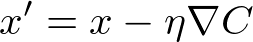

In [60]:
from IPython.display import Image
Image(filename="12.png")

Equation (12)

With that, the loss decreases on the next pass through the network.

I'm putting the same quiz below again. If you haven't already, set the number of epochs to something like 1000 and watch as the loss decreases!

In [ ]:
import numpy as np

class Node:
    """
    Base class for nodes in the network.

    Arguments:

        `inbound_nodes`: A list of nodes with edges into this node.
    """
    def __init__(self, inbound_nodes=[]):
        """
        Node's constructor (runs when the object is instantiated). Sets
        properties that all nodes need.
        """
        # A list of nodes with edges into this node.
        self.inbound_nodes = inbound_nodes
        # The eventual value of this node. Set by running
        # the forward() method.
        self.value = None
        # A list of nodes that this node outputs to.
        self.outbound_nodes = []
        # New property! Keys are the inputs to this node and
        # their values are the partials of this node with
        # respect to that input.
        self.gradients = {}
        # Sets this node as an outbound node for all of
        # this node's inputs.
        for node in inbound_nodes:
            node.outbound_nodes.append(self)

    def forward(self):
        """
        Every node that uses this class as a base class will
        need to define its own `forward` method.
        """
        raise NotImplementedError

    def backward(self):
        """
        Every node that uses this class as a base class will
        need to define its own `backward` method.
        """
        raise NotImplementedError


class Input(Node):
    """
    A generic input into the network.
    """
    def __init__(self):
        # The base class constructor has to run to set all
        # the properties here.
        #
        # The most important property on an Input is value.
        # self.value is set during `topological_sort` later.
        Node.__init__(self)

    def forward(self):
        # Do nothing because nothing is calculated.
        pass

    def backward(self):
        # An Input node has no inputs so the gradient (derivative)
        # is zero.
        # The key, `self`, is reference to this object.
        self.gradients = {self: 0}
        # Weights and bias may be inputs, so you need to sum
        # the gradient from output gradients.
        for n in self.outbound_nodes:
            self.gradients[self] += n.gradients[self]

class Linear(Node):
    """
    Represents a node that performs a linear transform.
    """
    def __init__(self, X, W, b):
        # The base class (Node) constructor. Weights and bias
        # are treated like inbound nodes.
        Node.__init__(self, [X, W, b])

    def forward(self):
        """
        Performs the math behind a linear transform.
        """
        X = self.inbound_nodes[0].value
        W = self.inbound_nodes[1].value
        b = self.inbound_nodes[2].value
        self.value = np.dot(X, W) + b

    def backward(self):
        """
        Calculates the gradient based on the output values.
        """
        # Initialize a partial for each of the inbound_nodes.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inbound_nodes}
        # Cycle through the outputs. The gradient will change depending
        # on each output, so the gradients are summed over all outputs.
        for n in self.outbound_nodes:
            # Get the partial of the cost with respect to this node.
            grad_cost = n.gradients[self]
            # Set the partial of the loss with respect to this node's inputs.
            self.gradients[self.inbound_nodes[0]] += np.dot(grad_cost, self.inbound_nodes[1].value.T)
            # Set the partial of the loss with respect to this node's weights.
            self.gradients[self.inbound_nodes[1]] += np.dot(self.inbound_nodes[0].value.T, grad_cost)
            # Set the partial of the loss with respect to this node's bias.
            self.gradients[self.inbound_nodes[2]] += np.sum(grad_cost, axis=0, keepdims=False)


class Sigmoid(Node):
    """
    Represents a node that performs the sigmoid activation function.
    """
    def __init__(self, node):
        # The base class constructor.
        Node.__init__(self, [node])

    def _sigmoid(self, x):
        """
        This method is separate from `forward` because it
        will be used with `backward` as well.

        `x`: A numpy array-like object.
        """
        return 1. / (1. + np.exp(-x))

    def forward(self):
        """
        Perform the sigmoid function and set the value.
        """
        input_value = self.inbound_nodes[0].value
        self.value = self._sigmoid(input_value)

    def backward(self):
        """
        Calculates the gradient using the derivative of
        the sigmoid function.
        """
        # Initialize the gradients to 0.
        self.gradients = {n: np.zeros_like(n.value) for n in self.inbound_nodes}
        # Sum the partial with respect to the input over all the outputs.
        for n in self.outbound_nodes:
            grad_cost = n.gradients[self]
            sigmoid = self.value
            self.gradients[self.inbound_nodes[0]] += sigmoid * (1 - sigmoid) * grad_cost


class MSE(Node):
    def __init__(self, y, a):
        """
        The mean squared error cost function.
        Should be used as the last node for a network.
        """
        # Call the base class' constructor.
        Node.__init__(self, [y, a])

    def forward(self):
        """
        Calculates the mean squared error.
        """
        # NOTE: We reshape these to avoid possible matrix/vector broadcast
        # errors.
        #
        # For example, if we subtract an array of shape (3,) from an array of shape
        # (3,1) we get an array of shape(3,3) as the result when we want
        # an array of shape (3,1) instead.
        #
        # Making both arrays (3,1) insures the result is (3,1) and does
        # an elementwise subtraction as expected.
        y = self.inbound_nodes[0].value.reshape(-1, 1)
        a = self.inbound_nodes[1].value.reshape(-1, 1)

        self.m = self.inbound_nodes[0].value.shape[0]
        # Save the computed output for backward.
        self.diff = y - a
        self.value = np.mean(self.diff**2)

    def backward(self):
        """
        Calculates the gradient of the cost.
        """
        self.gradients[self.inbound_nodes[0]] = (2 / self.m) * self.diff
        self.gradients[self.inbound_nodes[1]] = (-2 / self.m) * self.diff


def topological_sort(feed_dict):
    """
    Sort the nodes in topological order using Kahn's Algorithm.

    `feed_dict`: A dictionary where the key is a `Input` Node and the value is the respective value feed to that Node.

    Returns a list of sorted nodes.
    """

    input_nodes = [n for n in feed_dict.keys()]

    G = {}
    nodes = [n for n in input_nodes]
    while len(nodes) > 0:
        n = nodes.pop(0)
        if n not in G:
            G[n] = {'in': set(), 'out': set()}
        for m in n.outbound_nodes:
            if m not in G:
                G[m] = {'in': set(), 'out': set()}
            G[n]['out'].add(m)
            G[m]['in'].add(n)
            nodes.append(m)

    L = []
    S = set(input_nodes)
    while len(S) > 0:
        n = S.pop()

        if isinstance(n, Input):
            n.value = feed_dict[n]

        L.append(n)
        for m in n.outbound_nodes:
            G[n]['out'].remove(m)
            G[m]['in'].remove(n)
            # if no other incoming edges add to S
            if len(G[m]['in']) == 0:
                S.add(m)
    return L


def forward_and_backward(graph):
    """
    Performs a forward pass and a backward pass through a list of sorted Nodes.

    Arguments:

        `graph`: The result of calling `topological_sort`.
    """
    # Forward pass
    for n in graph:
        n.forward()

    # Backward pass
    # see: https://docs.python.org/2.3/whatsnew/section-slices.html
    for n in graph[::-1]:
        n.backward()


def sgd_update(trainables, learning_rate=1e-2):
    """
    Updates the value of each trainable with SGD.

    Arguments:

        `trainables`: A list of `Input` Nodes representing weights/biases.
        `learning_rate`: The learning rate.
    """
    # Performs SGD
    #
    # Loop over the trainables
    for t in trainables:
        # Change the trainable's value by subtracting the learning rate
        # multiplied by the partial of the cost with respect to this
        # trainable.
        partial = t.gradients[t]
        t.value -= learning_rate * partial


In [ ]:
"""
Have fun with the number of epochs!

Be warned that if you increase them too much,
the VM will time out :)
"""

import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample
from miniflow import *

# Load data
data = load_boston()
X_ = data['data']
y_ = data['target']

# Normalize data
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)

n_features = X_.shape[1]
n_hidden = 10
W1_ = np.random.randn(n_features, n_hidden)
b1_ = np.zeros(n_hidden)
W2_ = np.random.randn(n_hidden, 1)
b2_ = np.zeros(1)

# Neural network
X, y = Input(), Input()
W1, b1 = Input(), Input()
W2, b2 = Input(), Input()

l1 = Linear(X, W1, b1)
s1 = Sigmoid(l1)
l2 = Linear(s1, W2, b2)
cost = MSE(y, l2)

feed_dict = {
    X: X_,
    y: y_,
    W1: W1_,
    b1: b1_,
    W2: W2_,
    b2: b2_
}

epochs = 10000
# Total number of examples
m = X_.shape[0]
batch_size = 11
steps_per_epoch = m // batch_size

graph = topological_sort(feed_dict)
trainables = [W1, b1, W2, b2]

print("Total number of examples = {}".format(m))

# Step 4
for i in range(epochs):
    loss = 0
    for j in range(steps_per_epoch):
        # Step 1
        # Randomly sample a batch of examples
        X_batch, y_batch = resample(X_, y_, n_samples=batch_size)

        # Reset value of X and y Inputs
        X.value = X_batch
        y.value = y_batch

        # Step 2
        forward_and_backward(graph)

        # Step 3
        sgd_update(trainables)

        loss += graph[-1].value

    print("Epoch: {}, Loss: {:.3f}".format(i+1, loss/steps_per_epoch))

Congratulations on making it to the end of this lab! Building a neural network from scratch is no small task. You should be proud!

MiniFlow has the makings of becoming a powerful deep learning tool. It is entirely possible to classify something like the MNIST database with MiniFlow.

I'll leave it as an exercise for you to finish MiniFlow from here.